# **First Price Case**

In [205]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## IMPORTANT NOTE
The file contains the whole path of research. To check the report (which is located in the very end) click →[**here**](#report)←.

## 1) **Background**:

- **Social Discovery Platform**
- **Transactional Model**
- **High Rollers**

- **First payment**:
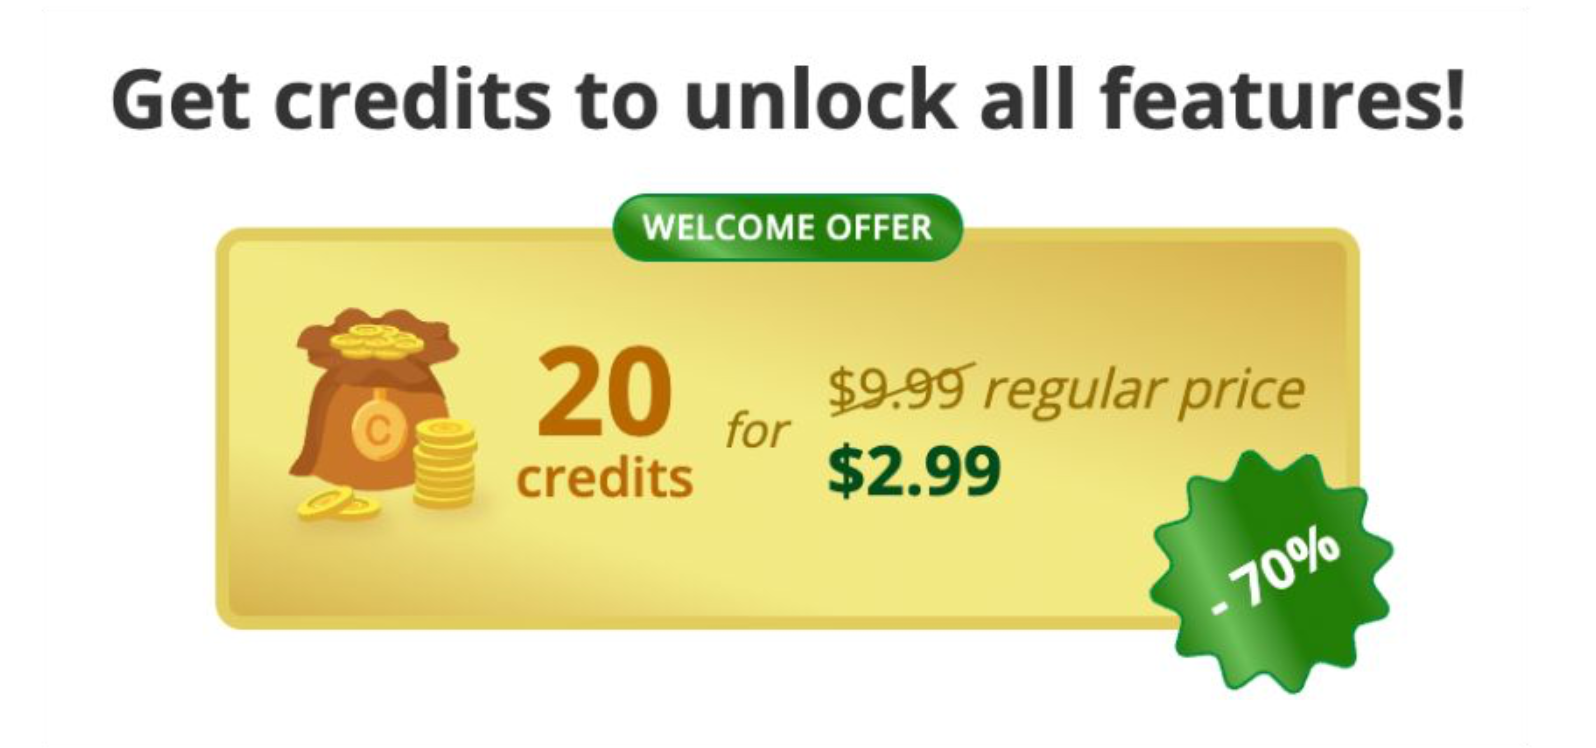

- **A/B test**:
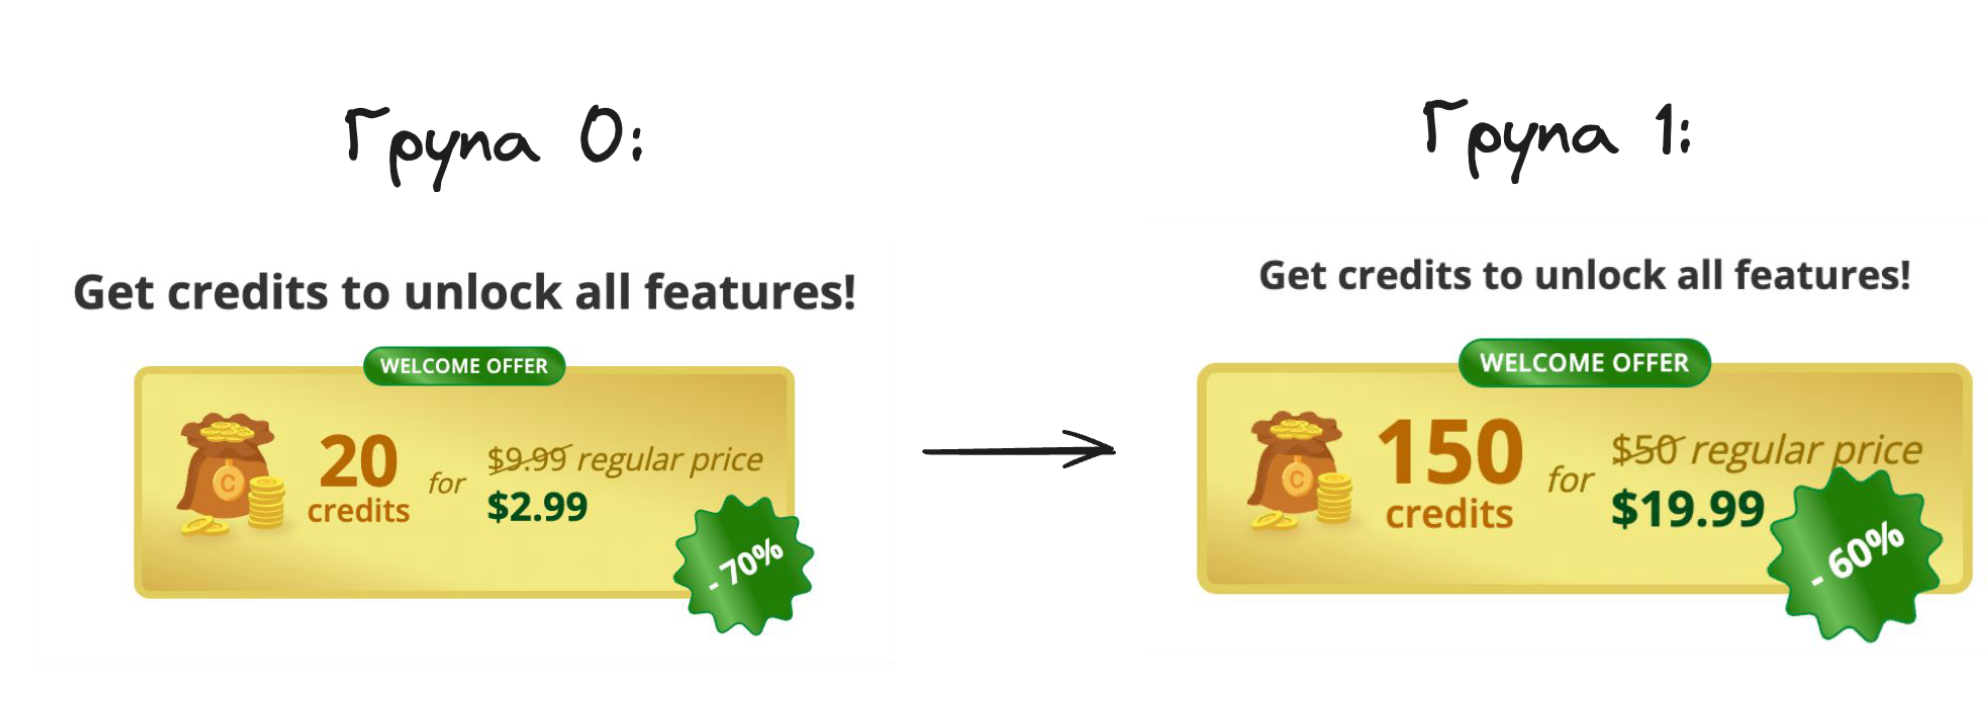

**Data description**:

* **id_user**: Unique user identifier
* **split_group**: Split group number. 0 indicates the control group with no changes, while 1 indicates the test group.
* **gender**: User's gender
* **os**: Operating system
* **browser**: User's browser
* **age_group**: User's age group
* **device**: User's device model
* **traffic_type**: Source of traffic
* **country_group**: User's country. Countries are grouped into several categories.
* **amount_Nd**: Total payment amount over N days
* **spend_Nd**: Total credit spending over N days

In [206]:
data = pd.read_csv('first_package_price_test.csv')
data.drop_duplicates(inplace=True)
data.head()

id_user  split_group gender       os        browser age_group  \
0  1521739            0   male  Android  Chrome Mobile     45-55   
1  1700297            0   male  Android  Chrome Mobile       35-   
2   459412            0   male  Android  Chrome Mobile       55+   
3  1906299            1   male  Android  Chrome Mobile     35-45   
4   886355            0   male  Android  Chrome Mobile     45-55   

                device  traffic_type       country_group  amount_1d  \
0     Maxwest Astro 8R             1       United States        0.0   
1                                  6               Other        0.0   
2                                  4  UK, GB, CA, NZ, AU        0.0   
3                                  4       United States        0.0   
4  OnePlus Nord N20 5G             4       United States        0.0   

   amount_3d  amount_7d  amount_14d  amount_30d  spend_1d  spend_3d  spend_7d  \
0        0.0        0.0         0.0         0.0       0.0       0.0       0.0   
1        0.0        0.0         0.0         0.0       0.0       0.0       0.0   
2        0.0        0.0         0.0         0.0       0.0       0.0       0.0   
3        0.0        0.0         0.0         0.0       0.0       0.0       0.0   
4        0.0        0.0         0.0         0.0       0.0       0.0       0.0   

   spend_14d  spend_30d  
0        0.0        0.0  
1        0.0        0.0  
2        0.0        0.0  
3        0.0        0.0  
4        0.0        0.0

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623230 entries, 0 to 1623229
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id_user        1623230 non-null  int64  
 1   split_group    1623230 non-null  int64  
 2   gender         1623230 non-null  object 
 3   os             1623154 non-null  object 
 4   browser        1623071 non-null  object 
 5   age_group      1623230 non-null  object 
 6   device         1622520 non-null  object 
 7   traffic_type   1623230 non-null  int64  
 8   country_group  1623230 non-null  object 
 9   amount_1d      1623230 non-null  float64
 10  amount_3d      1623230 non-null  float64
 11  amount_7d      1623230 non-null  float64
 12  amount_14d     1623230 non-null  float64
 13  amount_30d     1623230 non-null  float64
 14  spend_1d       1623230 non-null  float64
 15  spend_3d       1623230 non-null  float64
 16  spend_7d       1623230 non-null  float64
 17  spend_14

In [208]:
data.describe(include='all')

id_user   split_group   gender       os        browser age_group  \
count   1.623230e+06  1.623230e+06  1623230  1623154        1623071   1623230   
unique           NaN           NaN        2       22            139         4   
top              NaN           NaN     male  Android  Chrome Mobile       55+   
freq             NaN           NaN  1482653  1126235         729020    500696   
mean    1.384462e+06  5.172120e-01      NaN      NaN            NaN       NaN   
std     7.771670e+05  4.997038e-01      NaN      NaN            NaN       NaN   
min     1.000000e+00  0.000000e+00      NaN      NaN            NaN       NaN   
25%     7.243932e+05  0.000000e+00      NaN      NaN            NaN       NaN   
50%     1.400461e+06  1.000000e+00      NaN      NaN            NaN       NaN   
75%     2.059666e+06  1.000000e+00      NaN      NaN            NaN       NaN   
max     2.709170e+06  1.000000e+00      NaN      NaN            NaN       NaN   

         device  traffic_type  country_group     amount_1d     amount_3d  \
count   1622520  1.623230e+06        1623230  1.623230e+06  1.623230e+06   
unique     3831           NaN              3           NaN           NaN   
top                       NaN  United States           NaN           NaN   
freq     766151           NaN         998543           NaN           NaN   
mean        NaN  2.721415e+00            NaN  2.578043e-01  4.330692e-01   
std         NaN  1.870717e+00            NaN  7.942155e+00  1.474034e+01   
min         NaN  0.000000e+00            NaN  0.000000e+00  0.000000e+00   
25%         NaN  1.000000e+00            NaN  0.000000e+00  0.000000e+00   
50%         NaN  2.000000e+00            NaN  0.000000e+00  0.000000e+00   
75%         NaN  4.000000e+00            NaN  0.000000e+00  0.000000e+00   
max         NaN  6.000000e+00            NaN  3.589240e+03  7.008830e+03   

           amount_7d    amount_14d    amount_30d      spend_1d      spend_3d  \
count   1.623230e+06  1.623230e+06  1.623230e+06  1.623230e+06  1.623230e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    6.814678e-01  9.905943e-01  1.476528e+00  1.163186e+00  2.057405e+00   
std     2.809951e+01  4.471050e+01  7.616355e+01  3.925336e+01  7.702643e+01   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max     1.306933e+04  1.984899e+04  3.787866e+04  1.676800e+04  3.500400e+04   

            spend_7d     spend_14d     spend_30d  
count   1.623230e+06  1.623230e+06  1.623230e+06  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean    3.389159e+00  5.077112e+00  7.891120e+00  
std     1.567541e+02  2.592146e+02  4.551411e+02  
min     0.000000e+00  0.000000e+00  0.000000e+00  
25%     0.000000e+00  0.000000e+00  0.000000e+00  
50%     0.000000e+00  0.000000e+00  0.000000e+00  
75%     0.000000e+00  0.000000e+00  0.000000e+00  
max     8.634900e+04  1.312640e+05  2.505310e+05

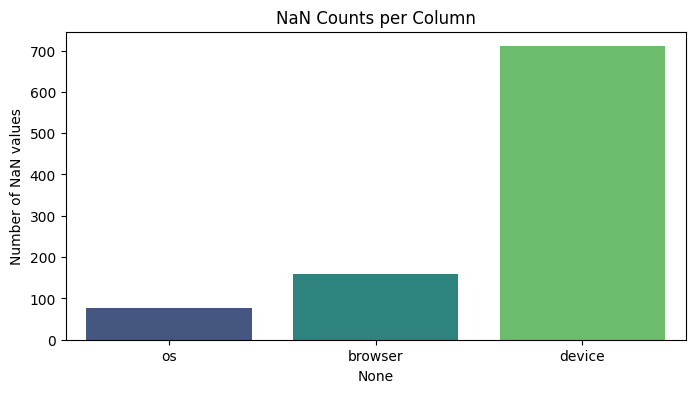

In [209]:
nan_columns = data.columns[data.isna().any()].tolist()
nan_counts = data[nan_columns].isna().sum()
plt.figure(figsize=(8, 4))
sns.barplot(x=nan_counts.index, y=nan_counts.values, palette="viridis")
plt.ylabel("Number of NaN values")
plt.title("NaN Counts per Column")
plt.show()

## 2) **A/B Test Metrics Framework for High-Roller Platform**

Our monetization model is **credit-based**: users purchase packages to spend within the platform.

**Test results:**
- Fewer payers in the test group
- ...but higher spending per payer

We need a balanced set of metrics that account for:

- **Total revenue**
- **User payment behavior**
- **Long-term monetization**
- **Risk of losing first-time payers**

### Primary Metrics (Decision-Making)

#### 1. **Average Revenue Per User (ARPU)**
**Definition:** Total revenue divided by total users in group across N-day window  
**Formula:** `ARPU_Nd = total_revenue_Nd / total_users_in_group`

**Why use it:**
- Direct measure of monetization effectiveness
- Accounts for both conversion and spending depth
- Primary metric for business impact assessment
- Balances volume vs value trade-off
- Most important metric for final decision making

#### 2. **Total Revenue**
**Definition:** Sum of all revenue generated by the group in N-day window  
**Formula:** `Total_Revenue_Nd = sum(amount_Nd)`

**Why use it:**
- Absolute measure of business impact
- Essential for ROI calculations
- Confirms ARPU findings at scale
- Direct input for financial planning
- Shows total business effect regardless of user base size

### Secondary Metrics (Understanding)

#### 3. **Conversion Rate (CR)**
**Definition:** Percentage of users who made at least one payment in N-day window  
**Formula:** `CR_Nd = (users_with_payment_Nd > 0) / total_users * 100`

**Time window breakdown:**
- **Fast CR (1d, 3d):** Immediate response to pricing changes
- **Eventual CR (14d, 30d):** Overall conversion potential

**Why use it:**
- Indicates pricing accessibility and user willingness to pay
- Critical for first-purchase funnel optimization
- Affects retargeting eligibility (users who never paid can't be retargeted)
- Important for building initial payment momentum
- Shows if higher prices scare away potential payers

#### 4. **Average Revenue Per Paying User (ARPPU)**
**Definition:** Revenue from paying users divided by number of paying users  
**Formula:** `ARPPU_Nd = total_revenue_from_payers / number_of_paying_users`

**Why use it:**
- Shows monetization depth among users who do convert
- Useful when CR drops but ARPU stays stable
- Indicates upselling effectiveness
- Key metric for understanding high-roller behavior
- Helps separate conversion effects from spending depth effects

#### 5. **Repeat Purchase Rate**
**Definition:** Percentage of paying users who made more than one purchase  
**Formula:** `Repeat_Rate = users_with_multiple_purchases / total_paying_users * 100`

**Why use it:**
- High-roller model depends on repeat purchasing behavior
- Indicates long-term monetization potential
- Shows pricing sustainability over time
- Critical for LTV estimation
- Reveals if initial high price affects future purchase willingness

#### 6. **Time to First Purchase**
**Definition:** Median time from user signup to first payment  
**Measurement:** Days between registration and first purchase

**Why use it:**
- High prices may delay first purchase decisions
- Critical for retention and engagement patterns
- Affects lifetime value calculations
- Important for marketing optimization and remarketing timing
- Shows if pricing creates decision paralysis

### Guardrail Metrics (Risk Management)

#### 7. **Revenue Distribution Analysis**
**Definition:** Analysis of how revenue is distributed across user base

**Key measurements:**
- **Top 1% Revenue Share:** Percentage of total revenue from top 1% of users
- **Top 5% Revenue Share:** Percentage of total revenue from top 5% of users
- **Top 10% Revenue Share:** Percentage of total revenue from top 10% of users
- **Gini Coefficient:** Measure of revenue inequality (0 = perfect equality, 1 = maximum inequality)

**Why use it:**
- Identifies whale dependency risk
- Shows revenue sustainability and business model stability
- Critical for high-roller platforms to avoid over-dependence
- Helps assess model fragility
- Important for forecasting and planning

```python
def calculate_revenue_concentration(revenue_series):
    sorted_revenue = revenue_series.sort_values(ascending=False)
    total_revenue = sorted_revenue.sum()
    
    # Top percentile analysis
    top_1_pct = sorted_revenue.head(int(len(sorted_revenue) * 0.01)).sum()
    top_5_pct = sorted_revenue.head(int(len(sorted_revenue) * 0.05)).sum()
    top_10_pct = sorted_revenue.head(int(len(sorted_revenue) * 0.10)).sum()
    
    return {
        'top_1_pct_share': top_1_pct / total_revenue * 100,
        'top_5_pct_share': top_5_pct / total_revenue * 100,
        'top_10_pct_share': top_10_pct / total_revenue * 100
    }

def gini_coefficient(revenue_series):
    sorted_revenue = revenue_series.sort_values()
    n = len(sorted_revenue)
    cumsum = sorted_revenue.cumsum()
    return (2 * sum((i + 1) * sorted_revenue.iloc[i] for i in range(n))) / (n * cumsum.iloc[-1]) - (n + 1) / n
```

#### 8. **Credit Utilization Rate**
**Definition:** Percentage of purchased credits that are actually spent  
**Formula:** `Credit_Utilization = total_spend_Nd / total_amount_Nd * 100`

**Why use it:**
- Indicates user engagement with purchased credits
- Low ratio suggests credit hoarding (bad for retention)
- High ratio shows active platform usage
- Unique metric for credit-based monetization models
- Shows if users are actually using what they buy

#### 9. **Revenue Volatility**
**Definition:** Coefficient of variation for revenue distribution  
**Formula:** `Revenue_Volatility = standard_deviation(revenue) / mean(revenue)`

**Why use it:**
- Measures revenue predictability
- High volatility indicates dependency on few users
- Important for financial planning and forecasting
- Risk assessment metric for business stability
- Shows if revenue model is sustainable

### Implementation Framework

#### Metric Priority for Decision Making:
1. **ARPU** - Primary decision metric
2. **Total Revenue** - Confirmation metric
3. **Revenue Distribution** - Risk assessment
4. **Conversion Rate** - User behavior understanding
5. **Credit Utilization** - Platform engagement health

#### Statistical Testing Approach:
1. **Bootstrap** for continuous metrics
2. **Chi-Square** for ration metrics

### Time Window Analysis Strategy

**1d, 3d windows:** Fast response indicators
- Show immediate reaction to pricing changes
- Useful for early signal detection
- May be noisy

**7d window:** Balanced view combining speed and reliability
- Good middle ground for decision making
- Captures initial user behavior patterns
- More stable than shorter windows

**14d, 30d windows:** Strategic decision making
- Most reliable for final business decisions
- Captures full user journey and behavior
- Include users who take time to decide

### Segmentation Recommendations

Analyze all metrics across these key segments:

**Geographic Segmentation:**
- **country_group** - Different purchasing power and price sensitivity

**Demographic Segmentation:**
- **age_group** - Price sensitivity varies significantly by age
- **gender** - Different spending patterns and preferences

**Technical Segmentation:**
- **traffic_type** - Organic vs paid users have different behaviors
- **device** - Mobile vs desktop spending patterns differ
- **os** - iOS vs Android users show different monetization patterns
- **browser** - May indicate technical sophistication and spending ability

**Important:** Apply Holm correction when testing multiple segments simultaneously to avoid false positives from multiple comparisons.

Defining functions mentioned above:

In [210]:
def calculate_revenue_concentration(revenue_series):
    if not isinstance(revenue_series, pd.Series) or isinstance(revenue_series, np.ndarray):
        revenue_series = pd.Series(revenue_series)

    sorted_revenue = revenue_series.sort_values(ascending=False)
    total_revenue = sorted_revenue.sum()
    
    # Top percentile analysis
    top_1_pct = sorted_revenue.head(int(len(sorted_revenue) * 0.01)).sum()
    top_5_pct = sorted_revenue.head(int(len(sorted_revenue) * 0.05)).sum()
    top_10_pct = sorted_revenue.head(int(len(sorted_revenue) * 0.10)).sum()
    
    return {
        'top_1_pct_share': top_1_pct / total_revenue * 100,
        'top_5_pct_share': top_5_pct / total_revenue * 100,
        'top_10_pct_share': top_10_pct / total_revenue * 100
    }

def gini_coefficient(revenue_series):
    if not isinstance(revenue_series, pd.Series) or isinstance(revenue_series, np.ndarray):
        revenue_series = pd.Series(revenue_series)
    sorted_revenue = revenue_series.sort_values()
    n = len(sorted_revenue)
    cumsum = sorted_revenue.cumsum()
    return (2 * sum((i + 1) * sorted_revenue.iloc[i] for i in range(n))) / (n * cumsum.iloc[-1]) - (n + 1) / n


def bootstrap_test(
    group0_values,
    group1_values,
    metric_func,
    n_bootstrap=10000,
    alpha=0.05
):
    """
    Bootstrap test for difference in any aggregated metric with CI

    Parameters:
    - group0_values: array-like, control group data
    - group1_values: array-like, test group data
    - metric_func: function to calculate the metric (e.g., np.mean, np.sum, etc.)
    - n_bootstrap: number of bootstrap iterations
    - alpha: significance level

    Returns:
    dict with observed difference, p-value, CI, significance
    """
    observed_diff = metric_func(group1_values) - metric_func(group0_values)

    n0, n1 = len(group0_values), len(group1_values)

    diffs_ci = []
    permutation_diffs_pvalue = []
    combined_data = np.concatenate([group0_values, group1_values])

    for _ in range(n_bootstrap):
        sample0 = np.random.choice(group0_values, size=n0, replace=True)
        sample1 = np.random.choice(group1_values, size=n1, replace=True)

        perm_sample = np.random.choice(combined_data, size=len(combined_data), replace=False)
        perm_group0 = perm_sample[:n0]
        perm_group1 = perm_sample[n0:]

        diff = metric_func(sample1) - metric_func(sample0)
        diffs_ci.append(diff)

        perm_diff = metric_func(perm_group1) - metric_func(perm_group0)
        permutation_diffs_pvalue.append(perm_diff)

    lower = np.percentile(diffs_ci, (alpha / 2) * 100)
    upper = np.percentile(diffs_ci, (1 - alpha / 2) * 100)

    p_value = np.mean(np.abs(permutation_diffs_pvalue) >= np.abs(observed_diff))

    return {
        'observed_diff': observed_diff,
        'p_value': p_value,
        'significant': p_value < alpha,
        'ci_lower': lower,
        'ci_upper': upper
    }


# For proportion metrics (CR, Repeat Purchase Rate)
def chi_square_test(success_0, total_0, success_1, total_1, alpha=0.05):
    """
    Chi-square test for proportion differences
    """
    contingency_table = [[success_0, total_0 - success_0],
                        [success_1, total_1 - success_1]]
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    return {
        'chi2': chi2,
        'p_value': p_value,
        'significant': p_value < alpha
    }

## 3) **Feature Engineering**

In [211]:
data['group'] = data['split_group'].map({0: 'control', 1: 'test'})

Credit utilization rate (spend/purchase ratio):

In [212]:
data['spr_1d'] = np.where(
    data['amount_1d'] > 0,
    data['spend_1d'] / data['amount_1d'],
    np.nan  # or 0 or other placeholder
)
data['spr_3d'] = np.where(
    data['amount_3d'] > 0,
    data['spend_3d'] / data['amount_3d'],
    np.nan  # or 0 or other placeholder
)
data['spr_7d'] = np.where(
    data['amount_7d'] > 0,
    data['spend_7d'] / data['amount_7d'],
    np.nan  # or 0 or other placeholder
)
data['spr_14d'] = np.where(
    data['amount_14d'] > 0,
    data['spend_14d'] / data['amount_14d'],
    np.nan  # or 0 or other placeholder
)
data['spr_30d'] = np.where(
    data['amount_30d'] > 0,
    data['spend_30d'] / data['amount_30d'],
    np.nan  # or 0 or other placeholder
)

ARPU & ARPPU:

In [213]:
data['arpu_1d'] = data['amount_1d']
data['arpu_3d'] = data['amount_3d']
data['arpu_7d'] = data['amount_7d']
data['arpu_14d'] = data['amount_14d']
data['arpu_30d'] = data['amount_30d']

data['is_payer_1d'] = data['amount_1d'] > 0
data['is_payer_3d'] = data['amount_3d'] > 0
data['is_payer_7d'] = data['amount_7d'] > 0
data['is_payer_14d'] = data['amount_14d'] > 0
data['is_payer_30d'] = data['amount_30d'] > 0

data['arppu_1d'] = np.where(data['is_payer_1d'], data['amount_1d'], np.nan)
data['arppu_3d'] = np.where(data['is_payer_3d'], data['amount_3d'], np.nan)
data['arppu_7d'] = np.where(data['is_payer_7d'], data['amount_7d'], np.nan)
data['arppu_14d'] = np.where(data['is_payer_14d'], data['amount_14d'], np.nan)
data['arppu_30d'] = np.where(data['is_payer_30d'], data['amount_30d'], np.nan)

data.drop(columns=['is_payer_1d', 'is_payer_3d', 'is_payer_7d', 'is_payer_14d', 'is_payer_30d'], inplace=True)

Time before first purchase:

In [214]:
def calculate_time_until_first_purchase(df):
    time_mapping = {
        '1d': '1 day',
        '3d': '3 days',
        '7d': '7 days',
        '14d': '14 days',
        '30d': '30 days'
    }

    conditions = []
    choices = []

    for suffix, description in sorted(time_mapping.items(), key=lambda item: int(item[0][:-1])):
        col_name = f'amount_{suffix}'
        if col_name in df.columns:
            conditions.append(df[col_name] > 0)
            choices.append(description)

    df['first_purchase_time'] = np.select(conditions, choices, default='No purchase within 30 days')

calculate_time_until_first_purchase(data)

Binary variables for CR calculations and minimum amount of payments (for Repeat Purchase Rate in future):

In [215]:
data['payer_0_1d'] = data['amount_1d'] > 0
data['payer_1_3d'] = (data['amount_3d'] - data['amount_1d']) > 0
data['payer_3_7d'] = (data['amount_7d'] - data['amount_3d']) > 0
data['payer_7_14d'] = (data['amount_14d'] - data['amount_7d']) > 0
data['payer_14_30d'] = (data['amount_30d'] - data['amount_14d']) > 0

data['min_payments'] = data[['payer_0_1d', 'payer_1_3d', 'payer_3_7d', 'payer_7_14d', 'payer_14_30d']].sum(axis=1)

## 4) **Aggregation and Inspection**

General comparison of test and control group to have a better idea of what is going on:

In [216]:

arpu_by_group = data.groupby('group')[
    ['arpu_1d', 'arpu_3d', 'arpu_7d', 'arpu_14d', 'arpu_30d']
].mean()

arppu_by_group = data.groupby('group')[
    ['arppu_1d', 'arppu_3d', 'arppu_7d', 'arppu_14d', 'arppu_30d']
].mean()


cr_by_group = data.groupby('group')[
    ['payer_0_1d', 'payer_1_3d', 'payer_3_7d', 'payer_7_14d', 'payer_14_30d']
].mean().rename(columns=lambda c: 'cr_' + c.split('_')[2]) * 100

spr_by_group = data.groupby('group')[
    ['spr_1d', 'spr_3d', 'spr_7d', 'spr_14d', 'spr_30d']
].mean()

total_revenue = data.groupby('group')['amount_30d'].sum()
revenue_concentration = {
    'top_1_pct_share': (data.groupby('group')['amount_30d'].apply(lambda x: calculate_revenue_concentration(x)['top_1_pct_share'])),
    'top_5_pct_share': (data.groupby('group')['amount_30d'].apply(lambda x: calculate_revenue_concentration(x)['top_5_pct_share'])),
    'top_10_pct_share': (data.groupby('group')['amount_30d'].apply(lambda x: calculate_revenue_concentration(x)['top_10_pct_share'])),
    'gini_coefficient': (data.groupby('group')['amount_30d'].apply(gini_coefficient))
}
revenue_concentration = pd.DataFrame(revenue_concentration)

revenue_volatility = data.groupby('group')['amount_30d'].std() / data.groupby('group')['amount_30d'].mean()

repeat_purchase_rate = (
    data[data['min_payments'] > 1].groupby('group')['id_user'].count() /
    data[data['min_payments'] > 0].groupby('group')['id_user'].count()
) * 100

first_purchase_time = data.groupby('group')['first_purchase_time'].value_counts(normalize=True).unstack(fill_value=0)

summary_metrics = pd.concat([
    arpu_by_group,
    arppu_by_group,
    cr_by_group,
    spr_by_group,
    total_revenue.rename('total_revenue'),
    revenue_concentration.rename(columns=lambda c: 'revenue_' + c),
    revenue_volatility.rename('revenue_volatility'),
    repeat_purchase_rate.rename('repeat_purchase_rate'),
    first_purchase_time.rename(columns=lambda c: 'First purchase in ' + c if c != 'No purchase within 30 days' else 'No purchase')
], axis=1)

diff_row = summary_metrics.loc['test'] - summary_metrics.loc['control']
diff_row.name = 'diff'
summary_metrics_with_diff = pd.concat([summary_metrics, pd.DataFrame([diff_row])])

def color_target_row(row, target_name ='diff'):
    styles = [''] * len(row)
    if row.name == 'diff':
        for i, val in enumerate(row):
            if val > 0:
                styles[i] = 'background-color: green'
            elif val < 0:
                styles[i] = 'background-color: red'
            elif val == 0:
                styles[i] = 'background-color: orange'
    return styles

summary_metrics_with_diff.style.apply(color_target_row, axis=1)

In [220]:
continuous_metrics = [
    ('arpu_1d', 'arpu_1d', np.mean),
    ('arpu_3d', 'arpu_3d', np.mean),
    ('arpu_7d', 'arpu_7d', np.mean),
    ('arpu_14d', 'arpu_14d', np.mean),
    ('arpu_30d', 'arpu_30d', np.mean),
    ('arppu_1d', 'arppu_1d', np.mean),
    ('arppu_3d', 'arppu_3d', np.mean),
    ('arppu_7d', 'arppu_7d', np.mean),
    ('arppu_14d', 'arppu_14d', np.mean),
    ('arppu_30d', 'arppu_30d', np.mean),
    ('spr_1d', 'spr_1d', np.mean),
    ('spr_3d', 'spr_3d', np.mean),
    ('spr_7d', 'spr_7d', np.mean),
    ('spr_14d', 'spr_14d', np.mean),
    ('spr_30d', 'spr_30d', np.mean),
    ('total_revenue', 'amount_30d', np.sum),
    ('revenue_volatility', 'amount_30d', lambda x: x.std() / x.mean())
]

control_data = data[data['group'] == 'control']
test_data = data[data['group'] == 'test']

In [221]:
results = []

# Continuous metrics → bootstrap
for name, column, function in continuous_metrics:
    result = bootstrap_test(
        control_data[column].dropna().values,
        test_data[column].dropna().values,
        function,
        n_bootstrap=2000
    )
    results.append({
        'metric': name,
        'type': 'continuous',
        **result
    })

In [222]:
proportion_metrics = [
    'cr_1d', 'cr_3d', 'cr_7d', 'cr_14d', 'cr_30d',
    'repeat_purchase_rate'
]

# Proportion metrics → chi-square
metric_to_binary_col = {
    'cr_1d': 'payer_0_1d',
    'cr_3d': 'payer_1_3d',
    'cr_7d': 'payer_3_7d',
    'cr_14d': 'payer_7_14d',
    'cr_30d': 'payer_14_30d',
    'repeat_purchase_rate': 'is_repeat_purchaser'
}

data['is_repeat_purchaser'] = data['min_payments'] > 1
data['is_payer'] = data['min_payments'] > 0

for metric in proportion_metrics:
    binary_col = metric_to_binary_col[metric]

    if metric == 'repeat_purchase_rate':
        control_success = data[(data['group'] == 'control') & (data['is_repeat_purchaser'])].shape[0]
        control_total = data[(data['group'] == 'control') & (data['is_payer'])].shape[0]

        test_success = data[(data['group'] == 'test') & (data['is_repeat_purchaser'])].shape[0]
        test_total = data[(data['group'] == 'test') & (data['is_payer'])].shape[0]
    else:
        control_success = data[(data['group'] == 'control') & (data[binary_col])].shape[0]
        control_total = data[data['group'] == 'control'].shape[0]

        test_success = data[(data['group'] == 'test') & (data[binary_col])].shape[0]
        test_total = data[data['group'] == 'test'].shape[0]

    result = chi_square_test(
        control_success, control_total,
        test_success, test_total
    )

    results.append({
        'metric': metric,
        'type': 'proportion',
        'observed_diff': (test_success / test_total) - (control_success / control_total),
        **result
    })


In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df[['metric', 'type', 'observed_diff', 'p_value', 'ci_lower', 'ci_upper', 'significant']]
results_df.sort_values('p_value', inplace=True)

In [ ]:
from statsmodels.stats.multitest import multipletests

bonf_pvals = multipletests(results_df['p_value'], method='bonferroni')
holm_pvals = multipletests(results_df['p_value'], method='holm')

results_df['p_bonferroni'] = bonf_pvals[1]
results_df['bonf_significant'] = bonf_pvals[0]
results_df['p_holm'] = holm_pvals[1]
results_df['holm_significant'] = holm_pvals[0]

def highlight_significance(val):
    if val is True:
        return 'background-color: green'
    elif val is False:
        return 'background-color: red'
    return ''

results_df.reset_index(drop=True).style.applymap(
    highlight_significance,
    subset=[col for col in results_df.columns if 'significant' in col]
)

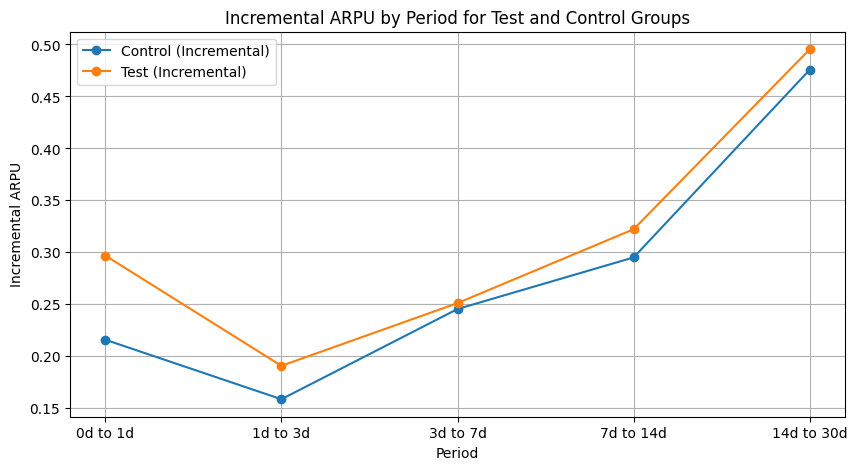

In [ ]:
arpu_periods = ['arpu_1d', 'arpu_3d', 'arpu_7d', 'arpu_14d', 'arpu_30d']
period_labels = ['0d to 1d', '1d to 3d', '3d to 7d', '7d to 14d', '14d to 30d'] # Updated labels for clarity

arpu_control_cumulative = summary_metrics.loc['control', arpu_periods].values
arpu_test_cumulative = summary_metrics.loc['test', arpu_periods].values

arpu_control_incremental = [arpu_control_cumulative[0]]
arpu_test_incremental = [arpu_test_cumulative[0]]

for i in range(1, len(arpu_periods)):
    arpu_control_incremental.append(arpu_control_cumulative[i] - arpu_control_cumulative[i-1])
    arpu_test_incremental.append(arpu_test_cumulative[i] - arpu_test_cumulative[i-1])

plt.figure(figsize=(10, 5))
plt.plot(period_labels, arpu_control_incremental, marker='o', label='Control (Incremental)')
plt.plot(period_labels, arpu_test_incremental, marker='o', label='Test (Incremental)')
plt.title('Incremental ARPU by Period for Test and Control Groups')
plt.xlabel('Period')
plt.ylabel('Incremental ARPU')
plt.legend()
plt.grid(True)
plt.show()

## 5) **Segmentation**

Theoretical segmentation priority and order:
- Geographic
- Demographic
- Traffic
- Technical 

### **Geographic:**

In [ ]:
segment_col = 'country_group'
data[segment_col].value_counts()

country_group
United States         998543
UK, GB, CA, NZ, AU    446107
Other                 178580
Name: count, dtype: int64

In [ ]:
def run_segmented_metric_tests(data, segment_cols, min_group_size=100):
    continuous_metrics = [
        ('arpu_1d', 'arpu_1d', np.mean),
        ('arpu_3d', 'arpu_3d', np.mean),
        ('arpu_7d', 'arpu_7d', np.mean),
        ('arpu_14d', 'arpu_14d', np.mean),
        ('arpu_30d', 'arpu_30d', np.mean),
        ('arppu_1d', 'arppu_1d', np.mean),
        ('arppu_3d', 'arppu_3d', np.mean),
        ('arppu_7d', 'arppu_7d', np.mean),
        ('arppu_14d', 'arppu_14d', np.mean),
        ('arppu_30d', 'arppu_30d', np.mean),
        ('spr_1d', 'spr_1d', np.mean),
        ('spr_3d', 'spr_3d', np.mean),
        ('spr_7d', 'spr_7d', np.mean),
        ('spr_14d', 'spr_14d', np.mean),
        ('spr_30d', 'spr_30d', np.mean),
        ('total_revenue', 'amount_30d', np.sum),
        ('revenue_volatility', 'amount_30d', lambda x: x.std() / x.mean())
    ]

    proportion_metrics = [
        'cr_1d', 'cr_3d', 'cr_7d', 'cr_14d', 'cr_30d', 'repeat_purchase_rate'
    ]

    metric_to_binary_col = {
        'cr_1d': 'payer_0_1d',
        'cr_3d': 'payer_1_3d',
        'cr_7d': 'payer_3_7d',
        'cr_14d': 'payer_7_14d',
        'cr_30d': 'payer_14_30d',
        'repeat_purchase_rate': 'is_repeat_purchaser'
    }

    data['is_repeat_purchaser'] = data['min_payments'] > 1
    data['is_payer'] = data['min_payments'] > 0

    results = []

    for segment in segment_cols:
        for val in data[segment].dropna().unique():
            sub = data[data[segment] == val]
            control_data = sub[sub['group'] == 'control']
            test_data = sub[sub['group'] == 'test']

            if len(control_data) < min_group_size or len(test_data) < min_group_size:
                print(f"Skipping segment {segment} = {val} due to insufficient data")
                continue

            # Continuous metrics
            for name, column, func in continuous_metrics:
                group0 = control_data[column].dropna().values
                group1 = test_data[column].dropna().values

                if len(group0) >= min_group_size and len(group1) >= min_group_size:
                    result = bootstrap_test(group0, group1, func, n_bootstrap=2000)
                    lift_pct = 100 * result['observed_diff'] / np.mean(group0) if np.mean(group0) != 0 else np.nan
                    results.append({
                        'metric': name,
                        'type': 'continuous',
                        'segment_col': segment,
                        'segment_val': val,
                        'control_mean': np.mean(group0),
                        'treatment_mean': np.mean(group1),
                        'lift_pct': lift_pct,
                        'n_control': len(group0),
                        'n_test': len(group1),
                        **result
                    })

            # Proportion metrics
            for metric in proportion_metrics:
                binary_col = metric_to_binary_col[metric]

                if metric == 'repeat_purchase_rate':
                    control_success = control_data[control_data['is_repeat_purchaser']].shape[0]
                    control_total = control_data[control_data['is_payer']].shape[0]
                    test_success = test_data[test_data['is_repeat_purchaser']].shape[0]
                    test_total = test_data[test_data['is_payer']].shape[0]
                else:
                    control_success = control_data[control_data[binary_col]].shape[0]
                    control_total = control_data.shape[0]
                    test_success = test_data[test_data[binary_col]].shape[0]
                    test_total = test_data.shape[0]

                if control_total >= min_group_size and test_total >= min_group_size:
                    if all(val > 0 for val in [control_success, control_total - control_success,
                           test_success, test_total - test_success]):
                        result = chi_square_test(control_success, control_total, test_success, test_total)
                        observed_diff = (test_success / test_total) - (control_success / control_total)
                        lift_pct = 100 * observed_diff / (control_success / control_total) if (control_success / control_total) != 0 else np.nan

                        results.append({
                            'metric': metric,
                            'type': 'proportion',
                            'segment_col': segment,
                            'segment_val': val,
                            'control_mean': control_success / control_total,
                            'treatment_mean': test_success / test_total,
                            'observed_diff': observed_diff,
                            'lift_pct': lift_pct,
                            'n_control': control_total,
                            'n_test': test_total,
                            **result
                        })
                    else:
                        result = {
                            'chi2': np.nan,
                            'p_value': np.nan,
                            'significant': False
                        }
                        observed_diff = np.nan
                        lift_pct = np.nan

    results_df = pd.DataFrame(results)
    if not results_df.empty:
        bonf_pvals = multipletests(results_df['p_value'], method='bonferroni')
        holm_pvals = multipletests(results_df['p_value'], method='holm')
        results_df['p_bonferroni'] = bonf_pvals[1]
        results_df['bonf_significant'] = bonf_pvals[0]
        results_df['p_holm'] = holm_pvals[1]
        results_df['holm_significant'] = holm_pvals[0]
        results_df.sort_values(['metric', 'segment_col', 'p_value'], inplace=True)

    return results_df

In [ ]:
seg_results = run_segmented_metric_tests(data, segment_cols=[segment_col])
# seg_results.sort_values(by=['lift_pct', 'significant'], ascending=[False, False]).reset_index(drop=True).style.applymap(
#     highlight_significance,
#     subset=[col for col in seg_results.columns if 'significant' in col]
# )

In [ ]:
significant_results = seg_results[seg_results['holm_significant']]
significant_results.drop(columns=['p_value', 'chi2', 'type', 'p_bonferroni', 'segment_col',
                         'p_holm', 'significant', 'bonf_significant', 'holm_significant'], inplace=True)

significant_results = significant_results.sort_values(by='lift_pct', ascending=False).reset_index(drop=True)
significant_results.set_index(['segment_val', 'metric'], inplace=True)
significant_results.sort_index(inplace=True)
significant_results.sort_values(
    by=['segment_val', 'lift_pct'],
    ascending=[True, False]
)

control_mean  treatment_mean  \
segment_val        metric                                               
Other              arppu_1d                 18.021840       47.601538   
                   arppu_30d                53.327023      124.333680   
                   arppu_3d                 25.982354       57.711777   
                   arppu_14d                42.996744       90.048786   
                   arppu_7d                 36.006938       71.021158   
                   repeat_purchase_rate      0.150668        0.286245   
                   spr_7d                    4.910042        5.414434   
                   spr_30d                   4.976333        5.446326   
                   spr_3d                    4.801666        5.237336   
                   spr_14d                   4.973480        5.417621   
                   cr_7d                     0.001921        0.001110   
                   cr_1d                     0.006500        0.003381   
UK, GB, CA, NZ, AU arppu_1d                 21.499728       48.987041   
                   arppu_3d                 30.844061       66.719223   
                   arppu_7d                 47.395356       85.771891   
                   arppu_14d                66.344356      110.820496   
                   arppu_30d                90.381971      149.096310   
                   repeat_purchase_rate      0.166380        0.272897   
                   arpu_1d                   0.261514        0.354177   
                   spr_7d                    4.460415        4.990813   
                   spr_14d                   4.496669        5.028851   
                   spr_30d                   4.545483        5.063207   
                   spr_3d                    4.428197        4.892226   
                   spr_1d                    4.299759        4.630332   
                   cr_3d                     0.003864        0.003002   
                   cr_14d                    0.002628        0.002029   
                   cr_7d                     0.003411        0.002541   
                   cr_30d                    0.002609        0.001815   
                   cr_1d                     0.012164        0.007230   
United States      arppu_1d                 24.001226       51.576574   
                   arppu_3d                 34.317783       68.649997   
                   arppu_14d                66.037414      127.948679   
                   arppu_7d                 49.070377       94.366400   
                   arppu_30d                95.867853      181.491929   
                   repeat_purchase_rate      0.172843        0.264216   
                   arpu_1d                   0.212067        0.297257   
                   arpu_3d                   0.366900        0.486798   
                   spr_30d                   4.896370        5.276233   
                   spr_7d                    4.796402        5.139993   
                   spr_14d                   4.861367        5.200714   
                   spr_3d                    4.732043        5.023899   
                   spr_1d                    4.564730        4.805022   
                   cr_3d                     0.002782        0.002333   
                   cr_7d                     0.002476        0.002052   
                   cr_14d                    0.002178        0.001719   
                   cr_30d                    0.002158        0.001559   
                   cr_1d                     0.008836        0.005763   

                                           lift_pct  n_control  n_test  \
segment_val        metric                                                
Other              arppu_1d              164.132518        511     338   
                   arppu_30d             133.153237        823     538   
                   arppu_3d              122.119125        616     422   
                   arppu_14d             109.431639        777     527   
                   

#### **Conclusion:**

The USA stands out as a separate segment because it is the only region showing a statistically significant increase in ARPU under treatment, indicating a broad revenue uplift across all users. In addition, the USA also shows significant positive lifts in ARPPU and SPR (spend per purchase), reinforcing stronger overall spending behavior.

Other regions show significant increases mostly in ARPPU and SPR but no significant ARPU growth, meaning the treatment mostly affects paying users without expanding overall revenue. This similarity across these regions suggests they can be grouped into one segment.

##### **Why segment USA separately, but keep other countries together?**

USA’s unique ARPU uplift points to fundamentally different user or market behavior, justifying separate targeting.
Other regions’ patterns are similar enough that further splitting would reduce statistical power and add complexity without clear benefit.

### **Demographic (age):**

In [ ]:
segment_col = 'age_group'
data[segment_col].value_counts()

age_group
55+      500696
35-      439386
45-55    356266
35-45    326882
Name: count, dtype: int64

In [ ]:
seg_results1 = run_segmented_metric_tests(data, segment_cols=[segment_col])
# seg_results1.sort_values(by=['lift_pct', 'significant'], ascending=[False, False]).reset_index(drop=True).style.applymap(
#     highlight_significance,
#     subset=[col for col in seg_results1.columns if 'significant' in col]
# )

In [ ]:
significant_results = seg_results1[seg_results1['holm_significant']]
significant_results.drop(columns=['p_value', 'chi2', 'type', 'p_bonferroni', 'segment_col',
                         'p_holm', 'significant', 'bonf_significant', 'holm_significant'], inplace=True)

significant_results = significant_results.sort_values(by='lift_pct', ascending=False).reset_index(drop=True)
significant_results.set_index(['segment_val', 'metric'], inplace=True)
significant_results.sort_index(inplace=True)
significant_results.sort_values(
    by=['segment_val', 'lift_pct'],
    ascending=[True, False]
)

control_mean  treatment_mean    lift_pct  n_control  \
segment_val metric                                                           
35-         arppu_3d      21.986639       56.519269  157.061890       1657   
            arppu_7d      25.462413       64.466883  153.184504       1774   
            arppu_1d      19.191837       47.906709  149.620238       1497   
            arppu_14d     30.940385       73.585394  137.829599       1843   
            arppu_30d     38.559018       90.007921  133.428976       1894   
...                             ...             ...         ...        ...   
55+         cr_3d          0.004800        0.004128  -13.994629     241257   
            cr_14d         0.003979        0.003218  -19.116506     241257   
            cr_7d          0.004601        0.003696  -19.658435     241257   
            cr_30d         0.003813        0.002872  -24.696856     241257   
            cr_1d          0.010433        0.007701  -26.182908     241257   

                       n_test  observed_diff   ci_lower   ci_upper  
segment_val metric                                                  
35-         arppu_3d      875      34.532630  26.655840  43.341242  
            arppu_7d      924      39.004470  30.422388  48.414302  
            arppu_1d      784      28.714872  22.315654  35.905641  
            arppu_14d     964      42.645009  30.939674  54.151829  
            arppu_30d     986      51.448903  33.588366  69.085554  
...                       ...            ...        ...        ...  
55+         cr_3d      259439      -0.000672        NaN        NaN  
            cr_14d     259439      -0.000761        NaN        NaN  
            cr_7d      259439      -0.000904        NaN        NaN  
            cr_30d     259439      -0.000942        NaN        NaN  
            cr_1d      259439      -0.002732        NaN        NaN  

[63 rows x 8 columns]

In [ ]:
for segment_value in seg_results1['segment_val'].unique():
    print(f"Segment: {segment_value}")
    display(significant_results.loc[segment_value])

Segment: 45-55


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                52.861454      119.942616  126.899955       2730   
arppu_1d                 20.293524       49.457514  143.710826       1785   
arppu_30d                75.650121      162.195073  114.401604       2971   
arppu_3d                 29.289222       69.923472  138.734480       2198   
arppu_7d                 39.260596       93.737304  138.756704       2501   
arpu_1d                   0.207888        0.327961   57.758387     174247   
arpu_3d                   0.369462        0.573159   55.133242     174247   
arpu_7d                   0.563515        0.874962   55.268675     174247   
cr_14d                    0.002433        0.001917  -21.203277     174247   
cr_1d                     0.010244        0.006631  -35.268207     174247   
cr_30d                    0.002611        0.001621  -37.933221     174247   
cr_7d                     0.002984        0.002362  -20.838558     174247   
repeat_purchase_rate      0.169976        0.267188   57.190903       2971   
spr_14d                   4.718850        5.274818   11.781842       2730   
spr_1d                    4.444580        4.825156    8.562707       1785   
spr_30d                   4.748505        5.339310   12.441933       2971   
spr_3d                    4.624050        5.095463   10.194805       2198   
spr_7d                    4.657422        5.233329   12.365348       2501   

                      n_test  observed_diff   ci_lower    ci_upper  
metric                                                              
arppu_14d               1835      67.081162  39.973019   98.975825  
arppu_1d                1207      29.163991  21.687397   38.809944  
arppu_30d               1920      86.544952  45.859101  136.382327  
arppu_3d                1492      40.634250  28.926534   55.485365  
arppu_7d                1699      54.476709  35.427618   80.545705  
arpu_1d               182019       0.120073   0.061725    0.185104  
arpu_3d               182019       0.203697   0.098019    0.338330  
arpu_7d               182019       0.311447   0.109309    0.566797  
cr_14d                182019      -0.000516        NaN         NaN  
cr_1d                 182019      -0.003613        NaN         NaN  
cr_30d                182019      -0.000991        NaN         NaN  
cr_7d                 182019      -0.000622        NaN         NaN  
repeat_purchase_rate    1920       0.097211        NaN         NaN  
spr_14d                 1835       0.555967   0.445867    0.672189  
spr_1d                  1207       0.380576   0.216501    0.546341  
spr_30d                 1920       0.590806   0.481540    0.702246  
spr_3d                  1492       0.471413   0.333119    0.602388  
spr_7d                  1699       0.575906   0.452552    0.698952

Segment: 35-


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                30.940385       73.585394  137.829599       1843   
arppu_1d                 19.191837       47.906709  149.620238       1497   
arppu_30d                38.559018       90.007921  133.428976       1894   
arppu_3d                 21.986639       56.519269  157.061890       1657   
arppu_7d                 25.462413       64.466883  153.184504       1774   
cr_1d                     0.007089        0.003435  -51.542104     211166   
cr_3d                     0.001103        0.000754  -31.696522     211166   
cr_7d                     0.000900        0.000521  -42.048637     211166   
repeat_purchase_rate      0.085005        0.173428  104.020259       1894   
spr_14d                   5.026579        5.409875    7.625381       1843   
spr_1d                    4.835496        5.256770    8.712116       1497   
spr_30d                   5.041546        5.420948    7.525513       1894   
spr_3d                    4.917757        5.339688    8.579742       1657   
spr_7d                    4.989306        5.365854    7.547104       1774   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_14d                964      42.645009  30.939674  54.151829  
arppu_1d                 784      28.714872  22.315654  35.905641  
arppu_30d                986      51.448903  33.588366  69.085554  
arppu_3d                 875      34.532630  26.655840  43.341242  
arppu_7d                 924      39.004470  30.422388  48.414302  
cr_1d                 228220      -0.003654        NaN        NaN  
cr_3d                 228220      -0.000350        NaN        NaN  
cr_7d                 228220      -0.000378        NaN        NaN  
repeat_purchase_rate     986       0.088423        NaN        NaN  
spr_14d                  964       0.383296   0.235883   0.535055  
spr_1d                   784       0.421274   0.252691   0.589972  
spr_30d                  986       0.379402   0.236143   0.525471  
spr_3d                   875       0.421931   0.265992   0.578353  
spr_7d                   924       0.376548   0.218615   0.544277

Segment: 55+


control_mean  treatment_mean   lift_pct  n_control  \
metric                                                                     
arppu_14d               100.384058      147.247705  46.684352       4322   
arppu_1d                 28.081236       52.753483  87.860265       2517   
arppu_30d               144.763690      215.289428  48.717837       4740   
arppu_3d                 44.120297       73.395753  66.353715       3268   
arppu_7d                 71.548233      104.690797  46.321988       3872   
arpu_1d                   0.292968        0.406267  38.672984     241257   
cr_14d                    0.003979        0.003218 -19.116506     241257   
cr_1d                     0.010433        0.007701 -26.182908     241257   
cr_30d                    0.003813        0.002872 -24.696856     241257   
cr_3d                     0.004800        0.004128 -13.994629     241257   
cr_7d                     0.004601        0.003696 -19.658435     241257   
repeat_purchase_rate      0.233122        0.324082  39.017921       4740   
spr_14d                   4.515259        4.933359   9.259720       4322   
spr_1d                    4.097525        4.377733   6.838477       2517   
spr_30d                   4.585783        5.005956   9.162516       4740   
spr_3d                    4.326657        4.703698   8.714384       3268   
spr_7d                    4.416204        4.861393  10.080807       3872   

                      n_test  observed_diff   ci_lower    ci_upper  
metric                                                              
arppu_14d               3347      46.863647  22.585469   70.523526  
arppu_1d                1998      24.672248  19.944533   29.518636  
arppu_30d               3567      70.525738  31.867465  108.544987  
arppu_3d                2604      29.275456  20.831375   38.133452  
arppu_7d                3035      33.142564  19.055390   47.818090  
arpu_1d               259439       0.113299   0.063673    0.159102  
cr_14d                259439      -0.000761        NaN         NaN  
cr_1d                 259439      -0.002732        NaN         NaN  
cr_30d                259439      -0.000942        NaN         NaN  
cr_3d                 259439      -0.000672        NaN         NaN  
cr_7d                 259439      -0.000904        NaN         NaN  
repeat_purchase_rate    3567       0.090959        NaN         NaN  
spr_14d                 3347       0.418100   0.328934    0.510209  
spr_1d                  1998       0.280208   0.135629    0.415951  
spr_30d                 3567       0.420173   0.338873    0.507199  
spr_3d                  2604       0.377041   0.261024    0.484881  
spr_7d                  3035       0.445189   0.346883    0.547903

Segment: 35-45


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                36.946235       81.332122  120.136425       2218   
arppu_1d                 20.385070       48.807749  139.428901       1647   
arppu_30d                44.863821      100.773721  124.621349       2363   
arppu_3d                 25.586389       57.673012  125.405045       1897   
arppu_7d                 31.712746       67.039808  111.397046       2065   
cr_14d                    0.001484        0.001018  -31.376257     157006   
cr_1d                     0.010490        0.005622  -46.408737     157006   
cr_30d                    0.001497        0.001007  -32.746875     157006   
cr_3d                     0.002299        0.001631  -29.081949     157006   
repeat_purchase_rate      0.107067        0.195494   82.590024       2363   
spr_14d                   4.986246        5.376941    7.835451       2218   
spr_30d                   5.011679        5.435829    8.463237       2363   
spr_3d                    4.914272        5.261950    7.074860       1897   
spr_7d                    4.975756        5.343746    7.395658       2065   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_14d               1315      44.385886  31.569767  59.465197  
arppu_1d                 955      28.422679  22.383859  34.908500  
arppu_30d               1376      55.909900  35.149866  78.834902  
arppu_3d                1119      32.086623  24.690164  40.113426  
arppu_7d                1249      35.327062  25.659046  45.355748  
cr_14d                169876      -0.000466        NaN        NaN  
cr_1d                 169876      -0.004868        NaN        NaN  
cr_30d                169876      -0.000490        NaN        NaN  
cr_3d                 169876      -0.000669        NaN        NaN  
repeat_purchase_rate    1376       0.088427        NaN        NaN  
spr_14d                 1315       0.390695   0.259303   0.521947  
spr_30d                 1376       0.424150   0.294760   0.547684  
spr_3d                  1119       0.347678   0.189881   0.492130  
spr_7d                  1249       0.367990   0.225691   0.507848

#### **Conclusion:**

The 45+ age group stands out as a separate segment due to a broad and statistically significant increase in ARPU, alongside consistently strong lifts in ARPPU, SPR (spend per purchase), and repeat purchase rate. This suggests the treatment drives higher engagement and monetization across the entire user base, not just among existing payers.

In contrast, the under-45 group shows even stronger lifts in ARPPU and RPR but no significant ARPU growth, and a much sharper decline in conversion rate (CR). This indicates the treatment primarily impacts monetization of existing payers, while reducing overall conversion—highlighting a more volatile response pattern.

##### **Why segment 45+ separately, but keep under-45 users grouped?**

* 45+ users respond with stable and broad-based improvements, including total revenue growth (ARPU), making them more suitable for direct monetization strategies.
* <45 users exhibit similar response profiles — strong gains among payers, lower CR, and no ARPU uplift — allowing them to be grouped together without losing insight.
* Further splitting <45 into narrower age bands adds complexity but yields diminishing returns in terms of actionable differences at this stage.


### **Demographic (gender):**

In [ ]:
segment_col = 'gender'
data[segment_col].value_counts()

gender
male      1482653
female     140577
Name: count, dtype: int64

In [ ]:
seg_results2 = run_segmented_metric_tests(data, segment_cols=[segment_col])
# seg_results2.sort_values(by=['lift_pct', 'significant'], ascending=[False, False]).reset_index(drop=True).style.applymap(
#     highlight_significance,
#     subset=[col for col in seg_results2.columns if 'significant' in col]
# )

In [ ]:
significant_results = seg_results2[seg_results2['holm_significant']]
significant_results.drop(columns=['p_value', 'chi2', 'type', 'p_bonferroni', 'segment_col',
                         'p_holm', 'significant', 'bonf_significant', 'holm_significant'], inplace=True)

significant_results = significant_results.sort_values(by='lift_pct', ascending=False).reset_index(drop=True)
significant_results.set_index(['segment_val', 'metric'], inplace=True)
significant_results.sort_index(inplace=True)
significant_results.sort_values(
    by=['segment_val', 'lift_pct'],
    ascending=[True, False]
)

control_mean  treatment_mean    lift_pct  \
segment_val metric                                                           
female      arppu_1d                 14.602667       42.737523  192.669306   
            arppu_3d                 20.898407       57.136178  173.399677   
            arppu_7d                 31.141372       68.022335  118.430759   
            arpu_1d                   0.093790        0.183603   95.759941   
            repeat_purchase_rate      0.131955        0.252137   91.077129   
            arpu_3d                   0.158515        0.290298   83.135737   
            cr_1d                     0.006423        0.004296  -33.112241   
male        arppu_1d                 23.210316       50.954928  119.535691   
            arppu_3d                 33.219905       67.906938  104.416411   
            arppu_7d                 48.522503       91.231667   88.019295   
            arppu_14d                65.278830      121.690170   86.415978   
            arppu_30d                91.650875      170.085253   85.579519   
            repeat_purchase_rate      0.171179        0.269747   57.581516   
            arpu_1d                   0.227035        0.308048   35.683202   
            arpu_3d                   0.394226        0.507102   28.632115   
            spr_7d                    4.684569        5.126795    9.440048   
            spr_30d                   4.778433        5.228784    9.424655   
            spr_14d                   4.739782        5.170047    9.077732   
            spr_3d                    4.628145        5.012097    8.296023   
            spr_1d                    4.477811        4.766350    6.443763   
            cr_3d                     0.003110        0.002500  -19.615809   
            cr_14d                    0.002319        0.001821  -21.484145   
            cr_7d                     0.002779        0.002172  -21.847895   
            cr_30d                    0.002300        0.001620  -29.578750   
            cr_1d                     0.009782        0.006046  -38.195379   

                                  n_control  n_test  observed_diff   ci_lower  \
segment_val metric                                                              
female      arppu_1d                    420     323      28.134857  21.142101   
            arppu_3d                    496     382      36.237771  26.075036   
            arppu_7d                    554     424      36.880963  22.915241   
            arpu_1d                   65392   75185       0.089813   0.050738   
            repeat_purchase_rate        629     468       0.120181        NaN   
            arpu_3d                   65392   75185       0.131783   0.063314   
            cr_1d                     65392   75185      -0.002127        NaN   
male        arppu_1d                   7026    4621      27.744612  24.421396   
            arppu_3d                   8524    5708      34.687033  29.469593   
            arppu_7d                   9658    6483      42.709165  33.735749   
            arppu_14d                 10515    7015      56.411339  44.120240   
            arppu_30d                 11339    7381      78.434378  58.674345   
            repeat_purchase_rate      11339    7381       0.098568        NaN   
            arpu_1d                  718284  764369       0.081013   0.055481   
            arpu_3d                  718284  764369       0.112875   0.067378   
            spr_7d                     9658    6483       0.442226   0.376874   
            spr_30d                   11339    7381       0.450351   0.391712   
            spr_14d                   10515    7015       0.430265   0.372213   
            spr_3d                     8524    5708       0.383952   0.313853   
            spr_1d                     7026    4621       0.288540   0.203235   
            cr_3d                    718284  764369      -0.000610        NaN   
            cr_14d                   718284  764369      -0.0004

#### **Conclusion:**

Both female and male segments show strong positive effects from treatment, especially in monetization metrics. Females see a sharp increase in ARPU (+96% Day 1) and ARPPU (up to +193%), along with a major boost in repeat purchase rate (+91%). However, their conversion rate (CR) declines significantly, suggesting the uplift is driven by existing payers, not new ones.

Males also exhibit robust improvements in ARPU (+36%), ARPPU (up to +120%), and repeat engagement (+58%). Additionally, metrics like spend-per-repeat (SPR) grow steadily. Similar to females, male CR drops (~-20% to -38%), indicating monetization gains come from deeper engagement, not broader reach.

##### **Should we segment by gender?**

We should segment by gender. The treatment impacts are consistently significant but differ in shape and strength: females respond with sharper short-term gains; males with broader, more sustained uplift. Separate strategies for each group will better capitalize on their respective behaviors.

### **Traffic:**

In [ ]:
segment_col = 'traffic_type'
data[segment_col].value_counts()

traffic_type
2    462048
1    353986
6    232635
4    179342
3    145866
0    131628
5    117725
Name: count, dtype: int64

In [ ]:
seg_results3 = run_segmented_metric_tests(data, segment_cols=[segment_col])
# seg_results3.sort_values(by=['lift_pct', 'significant'], ascending=[False, False]).reset_index(drop=True).style.applymap(
#     highlight_significance,
#     subset=[col for col in seg_results3.columns if 'significant' in col]
# )

In [ ]:
significant_results = seg_results3[seg_results3['holm_significant']]
significant_results.drop(columns=['p_value', 'chi2', 'type', 'p_bonferroni', 'segment_col',
                         'p_holm', 'significant', 'bonf_significant', 'holm_significant'], inplace=True)

significant_results = significant_results.sort_values(by='lift_pct', ascending=False).reset_index(drop=True)
significant_results.set_index(['segment_val', 'metric'], inplace=True)
significant_results.sort_index(inplace=True)
significant_results.sort_values(
    by=['segment_val', 'lift_pct'],
    ascending=[True, False]
)

control_mean  treatment_mean    lift_pct  \
segment_val metric                                                           
0           arppu_1d                 24.959266       61.344007  145.776489   
            arppu_3d                 37.014521       76.046840  105.451367   
            arppu_7d                 55.095267      105.569157   91.612025   
            arpu_1d                   0.298868        0.523063   75.014730   
            repeat_purchase_rate      0.162988        0.251126   54.076342   
...                                        ...             ...         ...   
6           spr_7d                    4.696409        5.050215    7.533540   
            spr_3d                    4.619887        4.920884    6.515232   
            cr_7d                     0.004190        0.003122  -25.489954   
            cr_30d                    0.003566        0.002526  -29.177159   
            cr_1d                     0.012385        0.007858  -36.553534   

                                  n_control  n_test  observed_diff   ci_lower  \
segment_val metric                                                              
0           arppu_1d                    749     589      36.384741  24.294755   
            arppu_3d                    898     693      39.032319  22.826119   
            arppu_7d                   1010     795      50.473890  19.988491   
            arpu_1d                   62551   69077       0.224195   0.100794   
            repeat_purchase_rate       1178     888       0.088138        NaN   
...                                     ...     ...            ...        ...   
6           spr_7d                     2096    1302       0.353806   0.215334   
            spr_3d                     1819    1139       0.300996   0.149055   
            cr_7d                    118610  114025      -0.001068        NaN   
            cr_30d                   118610  114025      -0.001041        NaN   
            cr_1d                    118610  114025      -0.004527        NaN   

                                   ci_upper  
segment_val metric                           
0           arppu_1d              50.655158  
            arppu_3d              58.618484  
            arppu_7d              93.964118  
            arpu_1d                0.360575  
            repeat_purchase_rate        NaN  
...                                     ...  
6           spr_7d                 0.493245  
            spr_3d                 0.455053  
            cr_7d                       NaN  
            cr_30d                      NaN  
            cr_1d                       NaN  

[76 rows x 8 columns]

In [ ]:
for segment_value in seg_results3['segment_val'].unique():
    print(f"Segment: {segment_value}")
    display(significant_results.loc[segment_value])

Segment: 1


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                63.632634      114.635591   80.152202       2369   
arppu_1d                 22.071755       46.314239  109.834874       1510   
arppu_30d                88.102334      156.308392   77.416857       2562   
arppu_3d                 31.748771       61.324244   93.154700       1872   
arppu_7d                 45.272801       84.955307   87.651978       2167   
cr_1d                     0.009100        0.005557  -38.928145     165943   
cr_30d                    0.002471        0.001675  -32.200192     165943   
cr_7d                     0.003049        0.002425  -20.472727     165943   
repeat_purchase_rate      0.184231        0.280294   52.142878       2562   
spr_14d                   4.815092        5.114903    6.226481       2369   
spr_30d                   4.883130        5.212648    6.748074       2562   
spr_3d                    4.676614        4.922977    5.267976       1872   
spr_7d                    4.736321        5.056147    6.752642       2167   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_14d               1683      51.002957  31.608460  70.699219  
arppu_1d                1045      24.242484  18.783405  29.732517  
arppu_30d               1766      68.206058  39.252275  96.055245  
arppu_3d                1336      29.575473  22.342022  37.683573  
arppu_7d                1564      39.682506  27.906066  52.607257  
cr_1d                 188043      -0.003542        NaN        NaN  
cr_30d                188043      -0.000796        NaN        NaN  
cr_7d                 188043      -0.000624        NaN        NaN  
repeat_purchase_rate    1766       0.096063        NaN        NaN  
spr_14d                 1683       0.299811   0.167465   0.429345  
spr_30d                 1766       0.329517   0.201663   0.454702  
spr_3d                  1336       0.246363   0.086159   0.398872  
spr_7d                  1564       0.319827   0.179995   0.462576

Segment: 6


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                73.247741      134.044326   83.001311       2306   
arppu_1d                 23.207781       52.009342  124.103037       1469   
arppu_30d               107.383175      190.862606   77.739768       2523   
arppu_3d                 35.526559       73.128156  105.840811       1819   
arppu_7d                 51.589299       97.535914   89.062299       2096   
arpu_1d                   0.287431        0.408686   42.185458     118610   
cr_1d                     0.012385        0.007858  -36.553534     118610   
cr_30d                    0.003566        0.002526  -29.177159     118610   
cr_7d                     0.004190        0.003122  -25.489954     118610   
repeat_purchase_rate      0.190250        0.307029   61.382212       2523   
spr_14d                   4.736132        5.116348    8.027980       2306   
spr_30d                   4.763067        5.166752    8.475323       2523   
spr_3d                    4.619887        4.920884    6.515232       1819   
spr_7d                    4.696409        5.050215    7.533540       2096   

                      n_test  observed_diff   ci_lower    ci_upper  
metric                                                              
arppu_14d               1424      60.796585  34.566313   87.160543  
arppu_1d                 896      28.801561  22.542401   35.209060  
arppu_30d               1508      83.479431  38.970779  126.608355  
arppu_3d                1139      37.601598  27.302183   49.799698  
arppu_7d                1302      45.946615  29.037339   63.778862  
arpu_1d               114025       0.121254   0.053797    0.181890  
cr_1d                 114025      -0.004527        NaN         NaN  
cr_30d                114025      -0.001041        NaN         NaN  
cr_7d                 114025      -0.001068        NaN         NaN  
repeat_purchase_rate    1508       0.116779        NaN         NaN  
spr_14d                 1424       0.380216   0.256412    0.511791  
spr_30d                 1508       0.403685   0.282903    0.532443  
spr_3d                  1139       0.300996   0.149055    0.455053  
spr_7d                  1302       0.353806   0.215334    0.493245

Segment: 2


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                55.302062      117.278504  112.068954       1872   
arppu_1d                 20.107285       51.810482  157.670205       1300   
arppu_30d                72.932996      168.029679  130.389107       2016   
arppu_3d                 28.372153       67.178850  136.777413       1528   
arppu_7d                 42.334448       87.452155  106.574454       1713   
cr_14d                    0.001229        0.000748  -39.188822     225304   
cr_1d                     0.005770        0.002982  -48.316577     225304   
cr_3d                     0.001500        0.001022  -31.862125     225304   
cr_7d                     0.001296        0.000807  -37.749845     225304   
repeat_purchase_rate      0.132440        0.225000   69.887640       2016   

                      n_test  observed_diff   ci_lower    ci_upper  
metric                                                              
arppu_14d               1043      61.976442  27.666864  101.367315  
arppu_1d                 706      31.703197  22.110488   44.774731  
arppu_30d               1120      95.096683  42.959796  151.655821  
arppu_3d                 861      38.806697  22.049329   60.517550  
arppu_7d                 965      45.117707  20.908204   76.743587  
cr_14d                236744      -0.000482        NaN         NaN  
cr_1d                 236744      -0.002788        NaN         NaN  
cr_3d                 236744      -0.000478        NaN         NaN  
cr_7d                 236744      -0.000489        NaN         NaN  
repeat_purchase_rate    1120       0.092560        NaN         NaN

Segment: 5


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                67.071887      124.254349   85.255485       1341   
arppu_1d                 25.482881       52.744103  106.978571        840   
arppu_30d               101.402840      175.501937   73.073986       1458   
arppu_3d                 35.591738       74.401673  109.041975       1070   
arppu_7d                 51.521336       97.823508   89.869900       1213   
arpu_1d                   0.361698        0.577497   59.662908      59181   
arpu_3d                   0.643503        1.033215   60.561041      59181   
cr_1d                     0.014194        0.010949  -22.860175      59181   
repeat_purchase_rate      0.217421        0.320230   47.285645       1458   
spr_14d                   4.644317        5.413507   16.561964       1341   
spr_1d                    4.383031        4.942991   12.775640        840   
spr_30d                   4.685750        5.429777   15.878489       1458   
spr_3d                    4.537317        5.266124   16.062508       1070   
spr_7d                    4.600708        5.404954   17.480926       1213   

                      n_test  observed_diff   ci_lower    ci_upper  
metric                                                              
arppu_14d                991      57.182462  33.213712   82.750554  
arppu_1d                 641      27.261222  18.330472   37.545517  
arppu_30d               1043      74.099097  28.119359  120.319881  
arppu_3d                 813      38.809934  26.679265   50.911606  
arppu_7d                 915      46.302173  27.683083   64.997517  
arpu_1d                58544       0.215799   0.092002    0.342040  
arpu_3d                58544       0.389712   0.173665    0.600687  
cr_1d                  58544      -0.003245        NaN         NaN  
repeat_purchase_rate    1043       0.102809        NaN         NaN  
spr_14d                  991       0.769190   0.629978    0.915507  
spr_1d                   641       0.559960   0.355628    0.767337  
spr_30d                 1043       0.744026   0.611174    0.880969  
spr_3d                   813       0.728807   0.562652    0.899881  
spr_7d                   915       0.804246   0.652844    0.958608

Segment: 0


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_1d                 24.959266       61.344007  145.776489        749   
arppu_3d                 37.014521       76.046840  105.451367        898   
arppu_7d                 55.095267      105.569157   91.612025       1010   
arpu_1d                   0.298868        0.523063   75.014730      62551   
cr_1d                     0.011974        0.008527  -28.791102      62551   
cr_30d                    0.002702        0.001694  -37.309758      62551   
repeat_purchase_rate      0.162988        0.251126   54.076342       1178   
spr_14d                   4.690879        5.249168   11.901600       1097   
spr_1d                    4.430392        4.931708   11.315397        749   
spr_30d                   4.743777        5.291437   11.544809       1178   
spr_3d                    4.537719        5.149005   13.471209        898   
spr_7d                    4.611269        5.180981   12.354772       1010   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_1d                 589      36.384741  24.294755  50.655158  
arppu_3d                 693      39.032319  22.826119  58.618484  
arppu_7d                 795      50.473890  19.988491  93.964118  
arpu_1d                69077       0.224195   0.100794   0.360575  
cr_1d                  69077      -0.003448        NaN        NaN  
cr_30d                 69077      -0.001008        NaN        NaN  
repeat_purchase_rate     888       0.088138        NaN        NaN  
spr_14d                  847       0.558290   0.392197   0.719586  
spr_1d                   589       0.501316   0.284022   0.720695  
spr_30d                  888       0.547660   0.387953   0.708975  
spr_3d                   693       0.611286   0.415972   0.807252  
spr_7d                   795       0.569712   0.398873   0.740187

Segment: 3


control_mean  treatment_mean   lift_pct  n_control  \
metric                                                                     
arppu_1d                 24.755955       44.114493  78.197497        937   
arppu_3d                 33.519963       59.246304  76.749311       1084   
cr_1d                     0.014438        0.008275 -42.683822      64900   
repeat_purchase_rate      0.142202        0.235110  65.335221       1308   
spr_14d                   4.687259        5.176347  10.434408       1254   
spr_30d                   4.702234        5.241885  11.476495       1308   
spr_3d                    4.628923        5.001609   8.051242       1084   
spr_7d                    4.654960        5.122921  10.052947       1193   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_1d                 670      19.358537  12.243453  25.595792  
arppu_3d                 790      25.726341  14.263743  37.652354  
cr_1d                  80966      -0.006163        NaN        NaN  
repeat_purchase_rate     957       0.092908        NaN        NaN  
spr_14d                  925       0.489088   0.328994   0.652832  
spr_30d                  957       0.539652   0.379642   0.684901  
spr_3d                   790       0.372686   0.184012   0.564084  
spr_7d                   863       0.467961   0.309292   0.647985

Segment: 4


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_1d                 19.270374       45.825416  137.802414        641   
arppu_3d                 24.652977       57.602773  133.654427        749   
cr_1d                     0.007352        0.004308  -41.404359      87187   
repeat_purchase_rate      0.119177        0.206349   73.145743        923   
spr_30d                   5.078608        5.501493    8.326794        923   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_1d                 397      26.555041  16.509752  35.377035  
arppu_3d                 458      32.949796  16.079696  46.193276  
cr_1d                  92155      -0.003044        NaN        NaN  
repeat_purchase_rate     567       0.087173        NaN        NaN  
spr_30d                  567       0.422885   0.240461   0.621112

#### **Conclusion:**

All traffic source segments show consistently strong positive lifts in ARPPU and repeat purchase rate, indicating that the treatment significantly boosts monetization among paying users across all sources. However, conversion rates (CR) deteriorate across the board, often by 20-40%, and ARPU gains are only significant in a few segments, notably Segment 6 and Segment 5.

* Segment 6 stands out with a statistically significant ARPU uplift, strong ARPPU and RPR lifts, and meaningful increases in SPR, suggesting this source benefits both in user volume and depth of spend.
* Segment 5 also shows ARPU growth, high SPR improvement, and the strongest RPR gain, pointing to a similarly broad-based positive treatment effect.
* Segment 1, 2, and 0 have strong ARPPU/RPR gains but no ARPU uplift, meaning the treatment improves revenue only among existing payers, not the broader base.
* Segments 3 and 4 are low-volume, but show the same pattern — strong ARPPU and RPR gains, no ARPU impact, and large CR drops.

##### **Why segment 6 and 5 separately, but keep others together?**

* Segments 6 and 5 are the only sources where treatment has broad monetization impact (ARPU + ARPPU + RPR), not just among payers, suggesting they’re strategically different and should be prioritized or targeted uniquely.
* The rest (segments 0 - 4) show highly similar patterns — payer monetization uplift but no broader revenue growth, and significant CR drops, which can be addressed with shared strategy or experimentation.
* Further splitting these lower-performing segments would reduce power without actionable differentiation at this point.

### **Technical:**

In [224]:
segment_col = 'os'
display(data[segment_col].value_counts())

def simplify_os(os_name):
    if not isinstance(os_name, str):
        return 'Other'
    os_name_lower = os_name.lower()
    if 'android' in os_name_lower or 'fire os' in os_name_lower or 'wear os' in os_name_lower or 'android tv' in os_name_lower:
        return 'Android (Mobile/TV/Wearable)'
    elif 'ios' in os_name_lower or 'ipados' in os_name_lower:
        return 'iOS/iPadOS'
    elif 'windows' in os_name_lower:
        return 'Windows (Desktop)'
    elif 'mac' in os_name_lower:
        return 'macOS (Desktop)'
    elif 'chrome os' in os_name_lower:
        return 'Chrome OS (Desktop)'
    elif 'linux' in os_name_lower or 'ubuntu' in os_name_lower or 'fedora' in os_name_lower or 'gentoo' in os_name_lower or 'freebsd' in os_name_lower:
        return 'GNU/Linux & Unix-like'
    elif 'playstation' in os_name_lower or 'nintendo' in os_name_lower:
        return 'Gaming Console'
    elif 'kaios' in os_name_lower:
        return 'KaiOS (Feature Phone)'
    else:
        return 'Other'

data['os_simplified'] = data[segment_col].apply(simplify_os)

segment_col = 'os_simplified'
data[segment_col].value_counts()

os
Android          1126235
iOS               341853
Windows            97988
Mac                26698
Chrome OS          10932
GNU/Linux          10408
iPadOS              7866
PlayStation          590
Ubuntu               216
KaiOS                135
Nintendo              81
HarmonyOS             50
Tizen                 34
Fuchsia               31
UNK                   15
Fedora                 5
Wear OS                5
FreeBSD                5
Android TV             4
Fire OS                1
BlackBerry OS          1
Gentoo                 1
Name: count, dtype: int64

os_simplified
Android (Mobile/TV/Wearable)    1126245
iOS/iPadOS                       349854
Windows (Desktop)                 97988
macOS (Desktop)                   26698
Chrome OS (Desktop)               10932
GNU/Linux & Unix-like             10635
Gaming Console                      671
Other                               207
Name: count, dtype: int64

In [ ]:
seg_results4 = run_segmented_metric_tests(data, segment_cols=[segment_col])
# seg_results4.sort_values(by=['lift_pct', 'significant'], ascending=[False, False]).reset_index(drop=True).style.applymap(
#     highlight_significance,
#     subset=[col for col in seg_results4.columns if 'significant' in col]
# )

In [ ]:
significant_results = seg_results4[seg_results4['holm_significant']]
significant_results.drop(columns=['p_value', 'chi2', 'type', 'p_bonferroni', 'segment_col',
                         'p_holm', 'significant', 'bonf_significant', 'holm_significant'], inplace=True)

significant_results = significant_results.sort_values(by='lift_pct', ascending=False).reset_index(drop=True)
significant_results.set_index(['segment_val', 'metric'], inplace=True)
significant_results.sort_index(inplace=True)
significant_results.sort_values(
    by=['segment_val', 'lift_pct'],
    ascending=[True, False]
)

control_mean  \
segment_val                  metric                               
Android (Mobile/TV/Wearable) arppu_1d                 20.868354   
                             arppu_3d                 30.682400   
                             arppu_7d                 46.244346   
                             arppu_14d                63.565873   
                             arppu_30d                92.403825   
                             repeat_purchase_rate      0.161290   
                             arpu_1d                   0.184024   
                             spr_7d                    4.684332   
                             spr_14d                   4.752829   
                             spr_30d                   4.804518   
                             spr_3d                    4.633770   
                             spr_1d                    4.456729   
                             cr_14d                    0.002214   
                             cr_3d                     0.002870   
                             cr_7d                     0.002689   
                             cr_30d                    0.002210   
                             cr_1d                     0.008818   
Gaming Console               revenue_volatility        0.000000   
Other                        revenue_volatility        0.000000   
Windows (Desktop)            arppu_1d                 21.447907   
                             arppu_3d                 30.614695   
                             arppu_7d                 49.768782   
                             arppu_30d                99.428338   
                             arppu_14d                69.601959   
                             arpu_1d                   0.195622   
                             arpu_3d                   0.351311   
                             spr_30d                   4.576580   
                             spr_7d                    4.462274   
                             cr_1d                     0.009121   
iOS/iPadOS                   arppu_1d                 26.825266   
                             arppu_3d                 36.817328   
                             arppu_30d                83.146612   
                             arppu_7d                 50.363633   
                             arppu_14d                65.519544   
                             repeat_purchase_rate      0.163574   
                             arpu_3d                   0.515268   
                             arpu_1d                   0.322464   
                             spr_30d                   4.815746   
                             spr_14d                   4.808960   
                             spr_7d                    4.779248   
                             spr_3d                    4.722303   
                             spr_1d                    4.632598   
                             cr_1d                     0.012021   

                                                   treatment_mean    lift_pct  \
segment_val                  metric                                             
Android (Mobile/TV/Wearable) arppu_1d                   48.716563  133.447085   
                             arppu_3d                   64.467071  110.110914   
                             arppu_7d                   87.306208   88.793259   
                             arppu_14d                 118.680191   86.704259   
                             arppu_30d                 168.167397   81.991814   
                             repeat_purchase_rate        0.265930   64.876382   
                             arpu_1d                     0.249343   35.494818   
                             spr_7d                      5.088616    8.630551   
                             spr_14d                     5.139249    8.130324   
                             spr_30d                     5.192629    8.078036   
                             spr_3d                      5.0027

#### **Conclusion:**

All major OS platforms (Windows, Android, iOS) show strong ARPPU and repeat purchase gains, indicating the treatment significantly boosts monetization among paying users. Moreover, ARPU is significantly uplifted across all three, suggesting the treatment has a broad revenue impact beyond just existing payers. However, conversion rates (CR) deteriorate across all platforms, with drops ranging from 25% to 40%.

* Windows (Desktop) stands out with the highest ARPU uplift (+88% day 1, +73% day 3), statistically significant and larger than mobile platforms. It also shows very strong ARPPU growth across all horizons and a notable increase in SPR, although CR drops by ~27%.
* Android shows a solid and statistically significant ARPU uplift (+35% day 1), with strong ARPPU and repeat purchase rate gains. SPR improves consistently. The CR drop is larger (~40%), but the volume is high, making this a strategically important segment.
* iOS/iPadOS mirrors Android in performance, with statistically significant ARPU uplift (~36%), excellent ARPPU growth, and strong RPR and SPR metrics. CR drops similarly (~32%).
* Gaming Console and Other platforms show no meaningful or reliable effects, likely due to low volume or inconsistent data.

##### **Why segment Android, iOS, and Windows together, and exclude others?**

* These three OS platforms are the only ones with significant ARPU uplift alongside strong payer monetization (ARPPU, RPR, SPR), indicating that the treatment enhances both conversion depth and breadth.
* Their conversion rate decline is consistent, suggesting a shared optimization challenge that can be addressed collectively.
* Grouping them allows statistical efficiency while retaining clear strategic focus on monetization growth.
* Gaming Console and other platforms don’t show sufficient or consistent data to justify targeted strategies — they can be grouped separately.

In [225]:
def simplify_os(os_name):
    if not isinstance(os_name, str):
        return 'Other'
    os_name_lower = os_name.lower()
    if 'android' in os_name_lower or 'fire os' in os_name_lower or 'wear os' in os_name_lower or 'android tv' in os_name_lower:
        return 'Android'
    elif 'ios' in os_name_lower or 'ipados' in os_name_lower:
        return 'iOS'
    elif 'windows' in os_name_lower:
        return 'Windows'
    else:
        return 'Other'

data['os_simplified'] = data[segment_col].apply(simplify_os)

data['os_simplified'].value_counts()

os_simplified
Android    1126245
iOS         349854
Windows      97988
Other        49143
Name: count, dtype: int64

### **Multilevel:**

In [226]:
def assign_segment(row):
    source_group = 'High' if row['traffic_type'] in {5, 6} else 'Low'
    age_group = 'Old' if row['age_group'] in {'45-55', '55+'} else 'Young'
    region_group = 'USA' if row['country_group'] == 'United States' else 'Non-USA'
    os_group = row['os_simplified']
    return f"{region_group}_{age_group}_{source_group}_{os_group}"

data['segment'] = data.apply(assign_segment, axis=1)
data['segment'].value_counts()

segment
USA_Old_Low_Android           332607
USA_Young_Low_Android         226974
Non-USA_Young_Low_Android     169603
Non-USA_Old_Low_Android       134774
USA_Old_High_Android          125106
USA_Young_Low_iOS             122123
Non-USA_Young_Low_iOS          69743
Non-USA_Old_High_Android       63136
USA_Old_Low_iOS                48833
Non-USA_Old_Low_iOS            42588
USA_Young_High_Android         39565
Non-USA_Young_High_Android     34480
Non-USA_Young_Low_Windows      26719
USA_Old_High_iOS               23686
Non-USA_Old_Low_Windows        23344
USA_Young_Low_Windows          20546
Non-USA_Old_High_iOS           18478
USA_Young_Low_Other            15405
USA_Young_High_iOS             14013
USA_Old_Low_Windows            12293
Non-USA_Young_High_iOS         10390
Non-USA_Young_Low_Other         9866
Non-USA_Old_Low_Other           9137
USA_Old_Low_Other               8315
Non-USA_Old_High_Windows        6522
USA_Old_High_Windows            4051
Non-USA_Young_High_Windows    

In [ ]:
segment_col = 'segment'
seg_results0 = run_segmented_metric_tests(data, segment_cols=[segment_col])
# seg_results0.sort_values(by=['lift_pct', 'significant'], ascending=[False, False]).reset_index(drop=True).style.applymap(
#     highlight_significance,
#     subset=[col for col in seg_results0.columns if 'significant' in col]
# )

In [ ]:
significant_results = seg_results0[seg_results0['holm_significant']]
significant_results.drop(columns=['p_value', 'chi2', 'type', 'p_bonferroni', 'segment_col',
                         'p_holm', 'significant', 'bonf_significant', 'holm_significant'], inplace=True)

significant_results = significant_results.sort_values(by='lift_pct', ascending=False).reset_index(drop=True)
significant_results.set_index(['segment_val', 'metric'], inplace=True)
significant_results.sort_index(inplace=True)
significant_results.sort_values(
    by=['segment_val', 'lift_pct'],
    ascending=[True, False]
)

control_mean  treatment_mean  \
segment_val              metric                                               
Non-USA_Old_High_Android arppu_1d                 24.359950       50.016354   
                         spr_14d                   4.342459        4.956602   
                         spr_7d                    4.306642        4.912856   
                         spr_3d                    4.210229        4.795430   
                         spr_30d                   4.379793        4.899825   
...                                                     ...             ...   
USA_Young_Low_iOS        arppu_1d                 26.223345       56.949045   
                         arppu_14d                40.816372       86.795840   
                         arppu_7d                 34.959601       73.646021   
                         repeat_purchase_rate      0.089955        0.184915   
                         cr_1d                     0.009100        0.005146   

                                                 lift_pct  n_control  n_test  \
segment_val              metric                                                
Non-USA_Old_High_Android arppu_1d              105.322071        401     288   
                         spr_14d                14.142746        685     479   
                         spr_7d                 14.076246        620     434   
                         spr_3d                 13.899524        534     368   
                         spr_30d                11.873442        745     511   
...                                                   ...        ...     ...   
USA_Young_Low_iOS        arppu_1d              117.169258        556     314   
                         arppu_14d             112.649570        645     399   
                         arppu_7d              110.660360        626     387   
                         repeat_purchase_rate  105.563666        667     411   
                         cr_1d                 -43.453919      61100   61023   

                                               observed_diff   ci_lower  \
segment_val              metric                                           
Non-USA_Old_High_Android arppu_1d                  25.656404  15.377983   
                         spr_14d                    0.614143   0.405542   
                         spr_7d                     0.606214   0.381441   
                         spr_3d                     0.585202   0.330768   
                         spr_30d                    0.520032   0.317951   
...                                                      ...        ...   
USA_Young_Low_iOS        arppu_1d                  30.725699  19.448654   
                         arppu_14d                 45.979468  23.651378   
                         arppu_7d                  38.686420  21.354249   
                         repeat_purchase_rate       0.094960        NaN   
                         cr_1d                     -0.003954        NaN   

                                                ci_upper  
segment_val              metric                           
Non-USA_Old_High_Android arppu_1d              38.883422  
                         spr_14d                0.820993  
                         spr_7d                 0.832971  
                         spr_3d                 0.838277  
                         spr_30d                0.717494  
...                                                  ...  
USA_Young_Low_iOS        arppu_1d              42.817357  
                         arppu_14d             69.732022  
                         arppu_7d              58.848867  
                         repeat_purchase_rate        NaN  
                         cr_1d                       NaN  

[93 rows x 8 columns]

In [ ]:
for segment_value in seg_results0['segment_val'].unique():
    print(f"Segment: {segment_value}")
    try:
        display(significant_results.loc[segment_value])
    except KeyError:
        print(f"No significant results for segment: {segment_value}\n")
        continue

Segment: USA_Old_Low_Android


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                67.842458      151.602880  123.463129       1867   
arppu_1d                 19.556336       53.466206  173.395827       1149   
arppu_30d                96.620533      216.155249  123.715646       2064   
arppu_3d                 32.353887       70.806334  118.849546       1446   
arppu_7d                 49.583149      106.679976  115.153693       1680   
arpu_1d                   0.141042        0.257009   82.221762     159316   
cr_1d                     0.007212        0.004807  -33.348741     159316   
repeat_purchase_rate      0.166182        0.263841   58.766383       2064   

                      n_test  observed_diff   ci_lower    ci_upper  
metric                                                              
arppu_14d               1361      83.760422  37.639007  137.695474  
arppu_1d                 833      33.909871  23.564851   47.259561  
arppu_30d               1463     119.534717  49.335120  208.939357  
arppu_3d                1042      38.452447  21.322451   59.997581  
arppu_7d                1230      57.096827  28.794304   94.514978  
arpu_1d               173291       0.115967   0.060930    0.186557  
cr_1d                 173291      -0.002405        NaN         NaN  
repeat_purchase_rate    1463       0.097659        NaN         NaN

Segment: USA_Young_Low_Android


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                33.540405       68.685490  104.784318       1012   
arppu_1d                 21.688345       49.258353  127.119008        737   
arppu_3d                 24.798314       58.343605  135.272470        848   
arppu_7d                 28.952569       64.824387  123.898568        942   
cr_14d                    0.001040        0.000541  -47.971364     108674   
cr_1d                     0.006782        0.003542  -47.773918     108674   
cr_3d                     0.001408        0.000828  -41.159609     108674   
cr_7d                     0.001270        0.000710  -44.083355     108674   
repeat_purchase_rate      0.101679        0.177305   74.376993       1072   
spr_14d                   5.026642        5.448048    8.383442       1012   
spr_30d                   5.058630        5.515916    9.039712       1072   
spr_3d                    4.909124        5.397823    9.954896        848   
spr_7d                    4.997907        5.456401    9.173703        942   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_14d                541      35.145085  20.767915  50.938979  
arppu_1d                 419      27.570009  17.108960  39.779092  
arppu_3d                 466      33.545291  21.685015  48.123150  
arppu_7d                 506      35.871818  22.633846  50.063441  
cr_14d                118300      -0.000499        NaN        NaN  
cr_1d                 118300      -0.003240        NaN        NaN  
cr_3d                 118300      -0.000579        NaN        NaN  
cr_7d                 118300      -0.000560        NaN        NaN  
repeat_purchase_rate     564       0.075626        NaN        NaN  
spr_14d                  541       0.421406   0.202249   0.643776  
spr_30d                  564       0.457286   0.247099   0.661890  
spr_3d                   466       0.488698   0.256400   0.721303  
spr_7d                   506       0.458493   0.235607   0.685764

Segment: Non-USA_Young_Low_Android


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                20.774440       79.051909  280.524855        813   
arppu_1d                 12.000111       42.197357  251.641399        633   
arppu_30d                22.631407      104.137439  360.145677        846   
arppu_3d                 13.933431       47.392043  240.131887        714   
arppu_7d                 17.148447       57.128876  233.143150        779   
cr_1d                     0.008176        0.003406  -58.342107      77417   
repeat_purchase_rate      0.076832        0.189845  147.091187        846   
spr_30d                   4.993875        5.331094    6.752661        846   
spr_3d                    4.869703        5.300575    8.848024        714   

                      n_test  observed_diff   ci_lower    ci_upper  
metric                                                              
arppu_14d                440      58.277469  37.230153   87.712870  
arppu_1d                 314      30.197246  24.401686   36.838144  
arppu_30d                453      81.506033  45.319925  129.430507  
arppu_3d                 372      33.458612  26.327596   40.851837  
arppu_7d                 418      39.980429  30.055356   51.654406  
cr_1d                  92186      -0.004770        NaN         NaN  
repeat_purchase_rate     453       0.113013        NaN         NaN  
spr_30d                  453       0.337219   0.132586    0.535381  
spr_3d                   372       0.430872   0.182109    0.679385

Segment: USA_Young_Low_iOS


control_mean  treatment_mean    lift_pct  n_control  \
metric                                                                      
arppu_14d                40.816372       86.795840  112.649570        645   
arppu_1d                 26.223345       56.949045  117.169258        556   
arppu_30d                47.186132      102.694988  117.638072        667   
arppu_3d                 30.027093       66.130451  120.235940        602   
arppu_7d                 34.959601       73.646021  110.660360        626   
cr_1d                     0.009100        0.005146  -43.453919      61100   
repeat_purchase_rate      0.089955        0.184915  105.563666        667   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_14d                399      45.979468  23.651378  69.732022  
arppu_1d                 314      30.725699  19.448654  42.817357  
arppu_30d                411      55.508856  28.107027  83.376185  
arppu_3d                 355      36.103358  21.980027  51.454331  
arppu_7d                 387      38.686420  21.354249  58.848867  
cr_1d                  61023      -0.003954        NaN        NaN  
repeat_purchase_rate     411       0.094960        NaN        NaN

Segment: USA_Old_High_iOS


control_mean  treatment_mean    lift_pct  n_control  n_test  \
metric                                                                   
arppu_14d     76.034200      192.979042  153.805580        300     261   
arppu_1d      26.944352       58.622901  117.570274        193     162   
arppu_3d      41.365907       90.879174  119.695833        237     218   
arppu_7d      54.958059      127.334217  131.693441        273     249   
arpu_14d       1.832591        4.481496  144.544239      12447   11239   
arpu_1d        0.417792        0.844996  102.252679      12447   11239   
arpu_3d        0.787637        1.762760  123.803557      12447   11239   
arpu_7d        1.205395        2.821089  134.038581      12447   11239   

           observed_diff   ci_lower    ci_upper  
metric                                           
arppu_14d     116.944842  56.443178  186.874601  
arppu_1d       31.678549  16.334442   48.291662  
arppu_3d       49.513267  23.931038   75.878306  
arppu_7d       72.376158  35.324420  117.117765  
arpu_14d        2.648905   1.085372    4.458070  
arpu_1d         0.427204   0.148279    0.697200  
arpu_3d         0.975123   0.444934    1.610191  
arpu_7d         1.615694   0.707453    2.613370

Segment: USA_Young_High_iOS
No significant results for segment: USA_Young_High_iOS

Segment: Non-USA_Young_High_Android


control_mean  treatment_mean    lift_pct  n_control  n_test  \
metric                                                                  
arppu_3d     18.873560       51.095478  170.725172        191     115   
arppu_7d     23.193056       61.685120  165.963749        216     125   
cr_1d         0.010358        0.004781  -53.840796      15447   19033   
cr_30d        0.002266        0.000525  -76.811703      15447   19033   
spr_14d       4.718218        5.461625   15.756096        237     135   
spr_3d        4.576715        5.336651   16.604384        191     115   
spr_7d        4.705250        5.465856   16.165048        216     125   

          observed_diff   ci_lower   ci_upper  
metric                                         
arppu_3d      32.221918  17.697975  47.087318  
arppu_7d      38.492064  18.248323  60.811326  
cr_1d         -0.005577        NaN        NaN  
cr_30d        -0.001740        NaN        NaN  
spr_14d        0.743407   0.361479   1.109613  
spr_3d         0.759935   0.308931   1.166013  
spr_7d         0.760606   0.366152   1.131206

Segment: Non-USA_Old_High_Android


control_mean  treatment_mean    lift_pct  n_control  n_test  \
metric                                                                  
arppu_1d     24.359950       50.016354  105.322071        401     288   
cr_1d         0.013325        0.008716  -34.591509      30093   33043   
spr_14d       4.342459        4.956602   14.142746        685     479   
spr_30d       4.379793        4.899825   11.873442        745     511   
spr_3d        4.210229        4.795430   13.899524        534     368   
spr_7d        4.306642        4.912856   14.076246        620     434   

          observed_diff   ci_lower   ci_upper  
metric                                         
arppu_1d      25.656404  15.377983  38.883422  
cr_1d         -0.004609        NaN        NaN  
spr_14d        0.614143   0.405542   0.820993  
spr_30d        0.520032   0.317951   0.717494  
spr_3d         0.585202   0.330768   0.838277  
spr_7d         0.606214   0.381441   0.832971

Segment: Non-USA_Old_High_iOS


control_mean  treatment_mean   lift_pct  n_control  n_test  \
metric                                                                
spr_14d      4.402712        5.326989  20.993369        244     201   
spr_30d      4.419177        5.314444  20.258666        263     208   
spr_3d       4.294085        5.268882  22.700935        198     163   
spr_7d       4.357688        5.392600  23.749106        223     184   

         observed_diff  ci_lower  ci_upper  
metric                                      
spr_14d       0.924277  0.608334  1.221227  
spr_30d       0.895266  0.592714  1.176430  
spr_3d        0.974797  0.619543  1.317717  
spr_7d        1.034912  0.731279  1.349542

Segment: USA_Young_High_Android


control_mean  treatment_mean    lift_pct  n_control  n_test  \
metric                                                                  
arppu_1d     17.312322       44.079173  154.611558        267     133   
cr_1d         0.012483        0.007317  -41.381791      21389   18176   

          observed_diff   ci_lower   ci_upper  
metric                                         
arppu_1d      26.766851  14.227168  44.516499  
cr_1d         -0.005166        NaN        NaN

Segment: USA_Old_High_Android


control_mean  treatment_mean   lift_pct  n_control  \
metric                                                                     
arppu_1d                 27.225619       51.197200  88.047881        751   
arppu_3d                 40.614588       70.707528  74.093916        972   
cr_1d                     0.011263        0.008129 -27.824912      66676   
cr_30d                    0.004289        0.002944 -31.372834      66676   
repeat_purchase_rate      0.226826        0.336056  48.155962       1424   
spr_14d                   4.774266        5.319321  11.416527       1281   
spr_30d                   4.829699        5.385938  11.517037       1424   
spr_7d                    4.718761        5.232701  10.891433       1144   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_1d                 475      23.971581  13.109661  35.905344  
arppu_3d                 635      30.092939  16.086480  44.508899  
cr_1d                  58430      -0.003134        NaN        NaN  
cr_30d                 58430      -0.001346        NaN        NaN  
repeat_purchase_rate     857       0.109230        NaN        NaN  
spr_14d                  808       0.545055   0.373739   0.722127  
spr_30d                  857       0.556238   0.389823   0.704050  
spr_7d                   725       0.513941   0.324832   0.704634

Segment: Non-USA_Old_Low_Android


control_mean  treatment_mean   lift_pct  n_control  \
metric                                                                     
arppu_1d                 24.022343       42.879775  78.499550        670   
arppu_3d                 35.708711       61.379345  71.888997        830   
cr_1d                     0.010863        0.006074 -44.079531      61680   
cr_7d                     0.004313        0.002709 -37.187484      61680   
repeat_purchase_rate      0.185403        0.297129  60.261212       1192   
spr_14d                   4.461639        4.996465  11.987202       1105   
spr_30d                   4.531786        5.065056  11.767307       1192   
spr_3d                    4.329591        4.878542  12.679060        830   
spr_7d                    4.371294        4.962870  13.533195        995   

                      n_test  observed_diff   ci_lower   ci_upper  
metric                                                             
arppu_1d                 444      18.857431   9.917951  27.726795  
arppu_3d                 580      25.670634  10.180813  38.937676  
cr_1d                  73094      -0.004788        NaN        NaN  
cr_7d                  73094      -0.001604        NaN        NaN  
repeat_purchase_rate     801       0.111726        NaN        NaN  
spr_14d                  761       0.534826   0.358867   0.711826  
spr_30d                  801       0.533269   0.361473   0.698455  
spr_3d                   580       0.548951   0.322563   0.765057  
spr_7d                   679       0.591576   0.395070   0.791021

Segment: USA_Old_Low_iOS


control_mean  treatment_mean   lift_pct  n_control  n_test  \
metric                                                                
spr_14d      4.684012        5.309237  13.348077        446     381   
spr_30d      4.715065        5.380593  14.114917        467     397   
spr_7d       4.619402        5.165106  11.813306        414     367   

         observed_diff  ci_lower  ci_upper  
metric                                      
spr_14d       0.625225  0.345722  0.901228  
spr_30d       0.665528  0.414783  0.931121  
spr_7d        0.545704  0.243793  0.839632

Segment: Non-USA_Old_Low_Windows


control_mean  treatment_mean    lift_pct  n_control  n_test  \
metric                                                                  
arppu_3d     27.354088       68.897524  151.872864        137     105   
arpu_1d       0.134235        0.363682  170.928713      11303   12041   

          observed_diff   ci_lower   ci_upper  
metric                                         
arppu_3d      41.543436  18.803846  66.245520  
arpu_1d        0.229446   0.102940   0.377241

Segment: Non-USA_Young_Low_iOS


control_mean  treatment_mean   lift_pct  n_control  n_test  \
metric                                                                 
arppu_1d     21.871893       39.654363  81.302841        354     204   
cr_1d         0.010622        0.005602 -47.264153      33326   36417   

          observed_diff  ci_lower   ci_upper  
metric                                        
arppu_1d      17.782470  8.553179  26.840049  
cr_1d         -0.005021       NaN        NaN

Segment: Non-USA_Old_Low_iOS


control_mean  treatment_mean    lift_pct  n_control  n_test  \
metric                                                                  
arppu_1d     27.335338       68.156545  149.334925        281     246   
arppu_3d     38.702918       89.392164  130.970089        353     305   
spr_14d       4.418451        5.053838   14.380313        428     370   
spr_30d       4.458396        5.140997   15.310454        461     391   
spr_7d        4.405663        5.050688   14.640812        395     344   

          observed_diff   ci_lower   ci_upper  
metric                                         
arppu_1d      40.821207  24.603826  59.633653  
arppu_3d      50.689246  26.140221  75.954693  
spr_14d        0.635387   0.377120   0.892345  
spr_30d        0.682601   0.436858   0.929191  
spr_7d         0.645025   0.366041   0.902423

Segment: USA_Old_Low_Windows
No significant results for segment: USA_Old_Low_Windows

Segment: USA_Old_High_Windows
No significant results for segment: USA_Old_High_Windows

Segment: Non-USA_Old_High_Windows
No significant results for segment: Non-USA_Old_High_Windows

Segment: USA_Young_Low_Windows
No significant results for segment: USA_Young_Low_Windows

Segment: Non-USA_Young_Low_Other
No significant results for segment: Non-USA_Young_Low_Other

Segment: Non-USA_Young_High_Other
No significant results for segment: Non-USA_Young_High_Other

Segment: Non-USA_Old_High_Other
No significant results for segment: Non-USA_Old_High_Other

Segment: USA_Young_Low_Other
No significant results for segment: USA_Young_Low_Other

Segment: Non-USA_Young_High_Windows
No significant results for segment: Non-USA_Young_High_Windows

Segment: USA_Old_High_Other
No significant results for segment: USA_Old_High_Other

Segment: Non-USA_Young_Low_Windows
No significant results for segment: Non-USA_Young_Low

## **Report:**

### 1. Executive Summary
The recent A/B pricing test evaluated the impact of a $19.99 price point (treatment) versus the baseline $2.99 price point (control) across a wide range of user segments. The experiment tracked monetization (ARPU, ARPPU, RPR), conversion (CR), and credit utilization (SPR) over multiple time windows.

**Key findings include**:
* Consistent ARPPU and RPR uplift under $19.99 across most mobile (Android and iOS) segments.
* Conversion Rate (CR) declined by 30–50% consistently across segments with the $19.99 price, indicating price sensitivity.
* ARPU gains were selective, concentrated in high-LTV and mature user segments.
* SPR improved in many segments, suggesting users spent more credits per dollar — indicating deeper engagement at the higher price.

**Pricing Strategy Recommendation:**
* **High-value** segments with strong ARPU, ARPPU, and RPR gains → assign $19.99 directly.
* **Mid-value** segments with ARPPU gains but flat ARPU → recommend A/B testing a mid-price point (e.g., $7.99–$14.99).
* **Low-value** segments or those with CR losses and no monetization lift → retain the $2.99 price to protect conversion volume.

This targeted approach maximizes revenue without broadly sacrificing conversion or increasing churn risk.

### 2. Experiment Design

| Element                | Description                                                                                                                                                                          |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Test Objective**     | Evaluate monetization, conversion, and credit usage under a new price point                                                                                                          |
| **Control Price**      | \$2.99                                                                                                                                                                               |
| **Treatment Price**    | \$19.99                                                                                                                                                                              |
| **Randomization Unit** | User ID                                                                                                                                                                              |
| **Segmentation Basis** | Geography (USA vs. Non-USA), Age (Young vs. Old), Traffic Type (Low vs. High), and Platform (Android, iOS, Windows, Other)                                                          |
| **Test Metrics**       | - ARPU (Average Revenue per User)  <br> - ARPPU (Average Revenue per Paying User) <br> - CR (Conversion Rate) <br> - RPR (Repeat Purchase Rate) <br> - SPR (Spend-to-Purchase Ratio) |
| **Analysis Method**    | Bootstrapped confidence intervals and statistical significance per segment                                                                                                           |

### 3. Metric Framework Overview

To evaluate the effectiveness of the pricing strategy, we used a structured metric framework that splits into primary, secondary, and guardrail categories:

#### Primary Metrics – Business-critical outcomes:

| Metric    | Description                                                         |
| --------- | ------------------------------------------------------------------- |
| **ARPU**  | Average Revenue Per User – reflects overall monetization impact     |
| **ARPPU** | Average Revenue Per Paying User – shows how much paying users spend |
| **CR**    | Conversion Rate – % of users who made a purchase                    |

These metrics indicate whether the new pricing increases total revenue, encourages purchases, or deters conversions.

#### Secondary Metrics – Behavior and efficiency indicators:

| Metric  | Description                                                   |
| ------- | ------------------------------------------------------------- |
| **RPR** | Repeat Purchase Rate – % of users with more than one purchase |
| **SPR** | Credits spent per dollar of real-money purchase — reflects in-app activity per dollar  |

* RPR helps assess whether users come back after their first purchase, which relates to LTV.
* SPR indicates how efficiently users convert money into platform activity.

### 4. Segmented Results & Pricing Recommendations

We assign each segment to one of three actions based on test outcomes:

| **Segment Group** | **Lift in ARPU/ARPPU/RPR** | **CR Impact** | **Observed Monetization Pattern** | **Pricing Recommendation** |
|-------------------|----------------------------|---------------|-----------------------------------|----------------------------|
| **SET $19.99 - STRONG REVENUE WITH ACCEPTABLE CR LOSS** | | | | |
| Non-USA_Young_Low_Android | ARPPU: +280% (14d), +360% (30d)<br>RPR: +147% | CR: -58% | Massive revenue gains justify conversion drop | **SET $19.99** |
| USA_Old_Low_Android | ARPPU: +123% (all periods)<br>RPR: +59%<br>ARPU: +82% | CR: -33% | Strong revenue growth, manageable CR decline | **SET $19.99** |
| USA_Old_High_iOS | ARPPU: +154% (14d), +118-132%<br>ARPU: +102-145% | No CR impact | Premium segment, no conversion penalty | **SET $19.99** |
| Non-USA_Old_Low_iOS | ARPPU: +149% (1d), +131% (3d) | No CR impact | Clean revenue gains, stable conversions | **SET $19.99** |
| Non-USA_Old_Low_Windows | ARPPU: +152% (3d)<br>ARPU: +171% (1d) | No CR impact | Strong gains, small but stable segment | **SET $19.99** |
| **KEEP $2.99 - CLOSE RESULTS OR HIGH CR SENSITIVITY** | | | | |
| USA_Young_High_Android | ARPPU: +155% (1d) | CR: -41% | Limited positive data, high conversion drop | **KEEP $2.99** |
| Non-USA_Young_Low_iOS | ARPPU: +81% (1d) | CR: -47% | Moderate gains don't justify conversion loss | **KEEP $2.99** |
| USA_Old_Low_iOS | SPR: +11-14% only | No CR impact | Minimal impact, maintain status quo | **KEEP $2.99** |
| Non-USA_Old_High_iOS | SPR: +20-24% only | No CR impact | Limited monetization improvement | **KEEP $2.99** |
| **TEST MIDDLE PRICING (~$8-12) - MIXED SIGNALS** | | | | |
| USA_Young_Low_iOS | ARPPU: +110-120%<br>RPR: +106% | CR: -43% | Strong revenue but significant CR drop | **TEST $8-10** |
| USA_Young_Low_Android | ARPPU: +105-135%<br>RPR: +74%<br>SPR: +8-9% | CR: -42-48% | Good monetization, concerning conversion loss | **TEST $8-10** |
| Non-USA_Young_High_Android | ARPPU: +165-171%<br>SPR: +16% | CR: -54% (1d), -77% (30d) | High revenue potential, severe CR decline | **TEST $10-12** |
| USA_Old_High_Android | ARPPU: +74-88%<br>RPR: +48%<br>SPR: +11-12% | CR: -28-31% | Balanced metrics suggest middle ground | **TEST $8-10** |
| Non-USA_Old_High_Android | ARPPU: +105% (1d)<br>SPR: +12-14% | CR: -35% | Moderate gains, moderate CR impact | **TEST $8-10** |
| Non-USA_Old_Low_Android | ARPPU: +72-79%<br>RPR: +60%<br>SPR: +12-14% | CR: -37-44% | Mixed performance suggests testing needed | **TEST $8-10** |

#### Decision Logic:

##### 💰 **SET $19.99**
**Criteria**: Revenue gains >100% ARPPU OR strong ARPU gains with CR impact ≤35% OR no CR impact
- Clear positive ROI despite any conversion decline
- Revenue increase justifies marketing optimization adjustments
- Established user behavior supports premium pricing

##### 🔒 **KEEP $2.99**
**Criteria**: Minimal monetization gains OR CR decline >45% without sufficient revenue compensation
- Preserves marketing funnel efficiency
- Maintains remarketing effectiveness  
- Supports easier subsequent purchase behavior
- Risk-averse approach for uncertain segments

##### 🧪 **TEST MIDDLE PRICING**
**Criteria**: Strong revenue potential (>70% ARPPU gains) but CR decline 35-50%
- Compromise between revenue and conversion optimization
- Allows marketing algorithms to adapt gradually
- Tests price elasticity in sensitive segments
- Reduces risk while capturing monetization upside

#### Implementation Priority:
1. **Immediate**: Deploy $19.99 for high-confidence segments
2. **Phase 2**: Launch middle pricing tests ($8-12 range) 
3. **Monitor**: Track $2.99 segments for future optimization opportunities

### 5. Visual Summary

In [292]:
def compute_summary_metrics(subdf):
    arpu_by_group = subdf.groupby('group')[
        ['arpu_1d', 'arpu_3d', 'arpu_7d', 'arpu_14d', 'arpu_30d']
    ].mean()

    arppu_by_group = subdf.groupby('group')[
        ['arppu_1d', 'arppu_3d', 'arppu_7d', 'arppu_14d', 'arppu_30d']
    ].mean()

    cr_by_group = subdf.groupby('group')[
        ['payer_0_1d', 'payer_1_3d', 'payer_3_7d', 'payer_7_14d', 'payer_14_30d']
    ].mean().rename(columns=lambda c: 'cr_' + c.split('_')[2]) * 100

    spr_by_group = subdf.groupby('group')[
        ['spr_1d', 'spr_3d', 'spr_7d', 'spr_14d', 'spr_30d']
    ].mean()

    total_revenue = subdf.groupby('group')['amount_30d'].sum()
    revenue_concentration = {
        'top_1_pct_share': (subdf.groupby('group')['amount_30d'].apply(lambda x: calculate_revenue_concentration(x)['top_1_pct_share'])),
        'top_5_pct_share': (subdf.groupby('group')['amount_30d'].apply(lambda x: calculate_revenue_concentration(x)['top_5_pct_share'])),
        'top_10_pct_share': (subdf.groupby('group')['amount_30d'].apply(lambda x: calculate_revenue_concentration(x)['top_10_pct_share'])),
        'gini_coefficient': (subdf.groupby('group')['amount_30d'].apply(gini_coefficient))
    }
    revenue_concentration = pd.DataFrame(revenue_concentration)

    revenue_volatility = subdf.groupby('group')['amount_30d'].std() / subdf.groupby('group')['amount_30d'].mean()

    repeat_purchase_rate = (
        subdf[subdf['min_payments'] > 1].groupby('group')['id_user'].count() /
        subdf[subdf['min_payments'] > 0].groupby('group')['id_user'].count()
    ) * 100

    first_purchase_time = subdf.groupby('group')['first_purchase_time'].value_counts(normalize=True).unstack(fill_value=0)

    summary_metrics = pd.concat([
        arpu_by_group,
        arppu_by_group,
        cr_by_group,
        spr_by_group,
        total_revenue.rename('total_revenue'),
        revenue_concentration.rename(columns=lambda c: 'revenue_' + c),
        revenue_volatility.rename('revenue_volatility'),
        repeat_purchase_rate.rename('repeat_purchase_rate'),
        first_purchase_time.rename(columns=lambda c: 'First purchase in ' + c if c != 'No purchase within 30 days' else 'No purchase')
    ], axis=1)

    diff_row = summary_metrics.loc['test'] - summary_metrics.loc['control']
    diff_row.name = 'diff'
    summary_metrics_with_diff = pd.concat([summary_metrics, pd.DataFrame([diff_row])])

    return summary_metrics_with_diff

In [293]:
def plot_ab_test_analysis(df, segment_name="Segment", figsize_multiplier=1.2):
    """
    Generate comprehensive A/B test visualization for a specific segment
    
    Parameters:
    df (pd.DataFrame): DataFrame with A/B test data for one segment
    segment_name (str): Name of the segment for titles
    figsize_multiplier (float): Scale factor for figure sizes
    
    Returns:
    dict: Dictionary containing all calculated metrics and statistical results
    """
    from scipy import stats

    plt.style.use('default')
    sns.set_palette("husl")

    control = df[df['group'] == 'control']
    treatment = df[df['group'] == 'test']

    metrics_results = {}

    fig = plt.figure(figsize=(20 * figsize_multiplier, 16 * figsize_multiplier))
    fig.suptitle(f'A/B Test Analysis: {segment_name}', fontsize=20, fontweight='bold')

    ax1 = plt.subplot(3, 4, 1)
    periods = ['1d', '3d', '7d', '14d', '30d']
    arpu_control = [control[f'arpu_{p}'].mean() for p in periods]
    arpu_treatment = [treatment[f'arpu_{p}'].mean() for p in periods]

    x_pos = np.arange(len(periods))
    width = 0.35

    bars1 = ax1.bar(x_pos - width/2, arpu_control, width, label='Control ($2.99)', alpha=0.8, color='#1f77b4')
    bars2 = ax1.bar(x_pos + width/2, arpu_treatment, width, label='Treatment ($19.99)', alpha=0.8, color='#ff7f0e')

    ax1.set_xlabel('Time Period')
    ax1.set_ylabel('ARPU ($)')
    ax1.set_title('Average Revenue Per User (Cumulative)')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(periods)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${height:.2f}', ha='center', va='bottom', fontsize=9)
    for bar in bars2:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${height:.2f}', ha='center', va='bottom', fontsize=9)

    for i, p in enumerate(periods):
        lift_pct = ((arpu_treatment[i] - arpu_control[i]) / arpu_control[i]) * 100 if arpu_control[i] > 0 else 0
        metrics_results[f'arpu_{p}'] = {
            'control_mean': arpu_control[i],
            'treatment_mean': arpu_treatment[i],
            'lift_pct': lift_pct
        }

    ax2 = plt.subplot(3, 4, 2)

    arppu_control = []
    arppu_treatment = []

    for p in periods:
        control_payers = control[control[f'arpu_{p}'] > 0]
        treatment_payers = treatment[treatment[f'arpu_{p}'] > 0]

        arppu_control.append(control_payers[f'arpu_{p}'].mean() if len(control_payers) > 0 else 0)
        arppu_treatment.append(treatment_payers[f'arpu_{p}'].mean() if len(treatment_payers) > 0 else 0)

    bars1 = ax2.bar(x_pos - width/2, arppu_control, width, label='Control ($2.99)', alpha=0.8, color='#1f77b4')
    bars2 = ax2.bar(x_pos + width/2, arppu_treatment, width, label='Treatment ($19.99)', alpha=0.8, color='#ff7f0e')

    ax2.set_xlabel('Time Period')
    ax2.set_ylabel('ARPPU ($)')
    ax2.set_title('Average Revenue Per Paying User (Cumulative)')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(periods)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'${height:.2f}', ha='center', va='bottom', fontsize=9)
    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'${height:.2f}', ha='center', va='bottom', fontsize=9)

    for i, p in enumerate(periods):
        lift_pct = ((arppu_treatment[i] - arppu_control[i]) / arppu_control[i]) * 100 if arppu_control[i] > 0 else 0
        metrics_results[f'arppu_{p}'] = {
            'control_mean': arppu_control[i],
            'treatment_mean': arppu_treatment[i],
            'lift_pct': lift_pct
        }

    ax3 = plt.subplot(3, 4, 3)

    cr_control = []
    cr_treatment = []

    for p in periods:
        cr_control.append((control[f'arpu_{p}'] > 0).mean())
        cr_treatment.append((treatment[f'arpu_{p}'] > 0).mean())

    ax3.plot(periods, cr_control, marker='o', linewidth=3, markersize=8, label='Control ($2.99)', color='#1f77b4')
    ax3.plot(periods, cr_treatment, marker='s', linewidth=3, markersize=8, label='Treatment ($19.99)', color='#ff7f0e')

    ax3.set_xlabel('Time Period')
    ax3.set_ylabel('Conversion Rate')
    ax3.set_title('Cumulative Conversion Rate Over Time')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, max(max(cr_control), max(cr_treatment)) * 1.1)

    for i, (c, t) in enumerate(zip(cr_control, cr_treatment)):
        ax3.text(i, c + max(cr_control) * 0.02, f'{c:.3f}', ha='center', va='bottom', fontsize=9, color='#1f77b4')
        ax3.text(i, t + max(cr_treatment) * 0.02, f'{t:.3f}', ha='center', va='bottom', fontsize=9, color='#ff7f0e')

    for i, p in enumerate(periods):
        lift_pct = ((cr_treatment[i] - cr_control[i]) / cr_control[i]) * 100 if cr_control[i] > 0 else 0
        metrics_results[f'cr_{p}'] = {
            'control_mean': cr_control[i],
            'treatment_mean': cr_treatment[i],
            'lift_pct': lift_pct
        }

    ax4 = plt.subplot(3, 4, 4)

    spr_control = [control[f'spr_{p}'].mean() for p in periods]
    spr_treatment = [treatment[f'spr_{p}'].mean() for p in periods]

    bars1 = ax4.bar(x_pos - width/2, spr_control, width, label='Control ($2.99)', alpha=0.8, color='#1f77b4')
    bars2 = ax4.bar(x_pos + width/2, spr_treatment, width, label='Treatment ($19.99)', alpha=0.8, color='#ff7f0e')

    ax4.set_xlabel('Time Period')
    ax4.set_ylabel('Average SPR')
    ax4.set_title('Spend Purchase Ratio (SPR)')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(periods)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    for i, p in enumerate(periods):
        lift_pct = ((spr_treatment[i] - spr_control[i]) / spr_control[i]) * 100 if spr_control[i] > 0 else 0
        metrics_results[f'spr_{p}'] = {
            'control_mean': spr_control[i],
            'treatment_mean': spr_treatment[i],
            'lift_pct': lift_pct
        }

    ax5 = plt.subplot(3, 4, 5)

    revenue_data = [
        control[control['arpu_14d'] > 0]['arpu_14d'].values,
        treatment[treatment['arpu_14d'] > 0]['arpu_14d'].values
    ]

    bp = ax5.boxplot(revenue_data, labels=['Control', 'Treatment'], patch_artist=True)
    bp['boxes'][0].set_facecolor('#1f77b4')
    bp['boxes'][1].set_facecolor('#ff7f0e')

    ax5.set_ylabel('Revenue (14d ARPU)')
    ax5.set_title('Revenue Distribution (Paying Users Only)')
    ax5.grid(True, alpha=0.3)

    ax6 = plt.subplot(3, 4, 6)

    rpr_control = (
        control[control['min_payments'] > 1]['id_user'].count() /
        control[control['min_payments'] > 0]['id_user'].count()
    ) * 100 if control[control['min_payments'] > 0]['id_user'].count() > 0 else 0

    rpr_treatment = (
        treatment[treatment['min_payments'] > 1]['id_user'].count() /
        treatment[treatment['min_payments'] > 0]['id_user'].count()
    ) * 100 if treatment[treatment['min_payments'] > 0]['id_user'].count() > 0 else 0

    bars = ax6.bar(['Control ($2.99)', 'Treatment ($19.99)'], [rpr_control, rpr_treatment], 
                   color=['#1f77b4', '#ff7f0e'], alpha=0.8)

    ax6.set_ylabel('Repeat Purchase Rate')
    ax6.set_title('Repeat Purchase Rate')
    ax6.set_ylim(0, max(rpr_control, rpr_treatment) * 1.2)
    ax6.grid(True, alpha=0.3)

    for bar, val in zip(bars, [rpr_control, rpr_treatment]):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                f'{val:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    lift_pct = ((rpr_treatment - rpr_control) / rpr_control) * 100 if rpr_control > 0 else 0
    metrics_results['repeat_purchase_rate'] = {
        'control_mean': rpr_control,
        'treatment_mean': rpr_treatment,
        'lift_pct': lift_pct
    }

    ax7 = plt.subplot(3, 4, 7)

    p_values = []
    metric_names = []

    for p in periods:
        _, p_val = stats.ttest_ind(control[f'arpu_{p}'], treatment[f'arpu_{p}'])
        p_values.append(p_val)
        metric_names.append(f'ARPU_{p}')

        control_conv = (control[f'arpu_{p}'] > 0).sum()
        treatment_conv = (treatment[f'arpu_{p}'] > 0).sum()
        control_total = len(control)
        treatment_total = len(treatment)

        contingency_table = np.array([
            [control_conv, control_total - control_conv],
            [treatment_conv, treatment_total - treatment_conv]
        ])

        _, p_val, _, _ = stats.chi2_contingency(contingency_table)
        p_values.append(p_val)
        metric_names.append(f'CR_{p}')

    significance_matrix = np.array(p_values).reshape(-1, 1)
    colors = ['red' if p < 0.05 else 'yellow' if p < 0.1 else 'green' for p in p_values]

    im = ax7.imshow(significance_matrix, cmap='RdYlGn_r', aspect='auto')
    ax7.set_yticks(range(len(metric_names)))
    ax7.set_yticklabels(metric_names)
    ax7.set_xticks([0])
    ax7.set_xticklabels(['p-value'])
    ax7.set_title('Statistical Significance')

    for i, p_val in enumerate(p_values):
        ax7.text(0, i, f'{p_val:.4f}', ha='center', va='center', 
                color='white' if p_val < 0.05 else 'black', fontweight='bold')

    ax8 = plt.subplot(3, 4, 8)

    sample_sizes = [len(control), len(treatment)]
    bars = ax8.bar(['Control', 'Treatment'], sample_sizes, color=['#1f77b4', '#ff7f0e'], alpha=0.8)

    ax8.set_ylabel('Sample Size')
    ax8.set_title('Sample Sizes')
    ax8.grid(True, alpha=0.3)

    for bar, val in zip(bars, sample_sizes):
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                f'{val:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax9 = plt.subplot(3, 4, 9)

    x_days = [1, 3, 7, 14, 30]
    total_revenue_control = [control[f'arpu_{p}'].sum() for p in periods]
    total_revenue_treatment = [treatment[f'arpu_{p}'].sum() for p in periods]

    ax9.plot(x_days, total_revenue_control, marker='o', linewidth=3, markersize=8, 
             label='Control ($2.99)', color='#1f77b4')
    ax9.plot(x_days, total_revenue_treatment, marker='s', linewidth=3, markersize=8, 
             label='Treatment ($19.99)', color='#ff7f0e')

    ax9.set_xlabel('Days')
    ax9.set_ylabel('Total Revenue ($)')
    ax9.set_title('Cumulative Total Revenue')
    ax9.legend()
    ax9.grid(True, alpha=0.3)
    ax9.set_xscale('log')
    ax9.set_xticks(x_days)
    ax9.set_xticklabels(['1d', '3d', '7d', '14d', '30d'])

    ax10 = plt.subplot(3, 4, 10)

    control_revenue = control[control['arpu_14d'] > 0]['arpu_14d']
    treatment_revenue = treatment[treatment['arpu_14d'] > 0]['arpu_14d']

    max_revenue = max(control_revenue.max(), treatment_revenue.max())
    bins = np.linspace(0, min(max_revenue, 500), 20)

    ax10.hist(control_revenue, bins=bins, alpha=0.7, label='Control ($2.99)', 
              color='#1f77b4', density=True)
    ax10.hist(treatment_revenue, bins=bins, alpha=0.7, label='Treatment ($19.99)', 
              color='#ff7f0e', density=True)

    ax10.set_xlabel('Revenue per User ($)')
    ax10.set_ylabel('Density')
    ax10.set_title('Revenue Distribution (14d, Paying Users)')
    ax10.legend()
    ax10.grid(True, alpha=0.3)

    ax11 = plt.subplot(3, 4, 11)

    funnel_periods = ['1d', '7d', '14d', '30d']
    control_funnel = [len(control)] + [(control[f'arpu_{p}'] > 0).sum() for p in funnel_periods]
    treatment_funnel = [len(treatment)] + [(treatment[f'arpu_{p}'] > 0).sum() for p in funnel_periods]

    funnel_labels = ['Total Users'] + [f'Payers {p}' for p in funnel_periods]

    x = np.arange(len(funnel_labels))
    width = 0.35

    bars1 = ax11.bar(x - width/2, control_funnel, width, label='Control ($2.99)', 
                     alpha=0.8, color='#1f77b4')
    bars2 = ax11.bar(x + width/2, treatment_funnel, width, label='Treatment ($19.99)', 
                     alpha=0.8, color='#ff7f0e')

    ax11.set_ylabel('Number of Users')
    ax11.set_title('Conversion Funnel')
    ax11.set_xticks(x)
    ax11.set_xticklabels(funnel_labels, rotation=45)
    ax11.legend()
    ax11.grid(True, alpha=0.3)
    
    ax12 = plt.subplot(3, 4, 12)
    ax12.axis('off')

    summary_data = [
        ['Metric', 'Control', 'Treatment', 'Lift %'],
        ['14d ARPU', f'${metrics_results["arpu_14d"]["control_mean"]:.2f}', 
         f'${metrics_results["arpu_14d"]["treatment_mean"]:.2f}', 
         f'{metrics_results["arpu_14d"]["lift_pct"]:.1f}%'],
        ['14d ARPPU', f'${metrics_results["arppu_14d"]["control_mean"]:.2f}', 
         f'${metrics_results["arppu_14d"]["treatment_mean"]:.2f}', 
         f'{metrics_results["arppu_14d"]["lift_pct"]:.1f}%'],
        ['14d CR', f'{metrics_results["cr_14d"]["control_mean"]:.3f}', 
         f'{metrics_results["cr_14d"]["treatment_mean"]:.3f}', 
         f'{metrics_results["cr_14d"]["lift_pct"]:.1f}%'],
        ['RPR', f'{metrics_results["repeat_purchase_rate"]["control_mean"]:.3f}', 
         f'{metrics_results["repeat_purchase_rate"]["treatment_mean"]:.3f}', 
         f'{metrics_results["repeat_purchase_rate"]["lift_pct"]:.1f}%'],
        ['Sample Size', f'{len(control):,}', f'{len(treatment):,}', '-']
    ]

    table = ax12.table(cellText=summary_data[1:], colLabels=summary_data[0],
                      cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)

    for i in range(1, len(summary_data)):
        if i < len(summary_data) - 1:
            lift_val = float(summary_data[i][3].replace('%', ''))
            if lift_val > 10:
                table[(i, 3)].set_facecolor('#90EE90')
            elif lift_val < -10:
                table[(i, 3)].set_facecolor('#FFB6C1')
            else:
                table[(i, 3)].set_facecolor('#FFFFE0')

    ax12.set_title('Key Metrics Summary', pad=20, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return metrics_results

**USA\_Old\_High\_iOS**

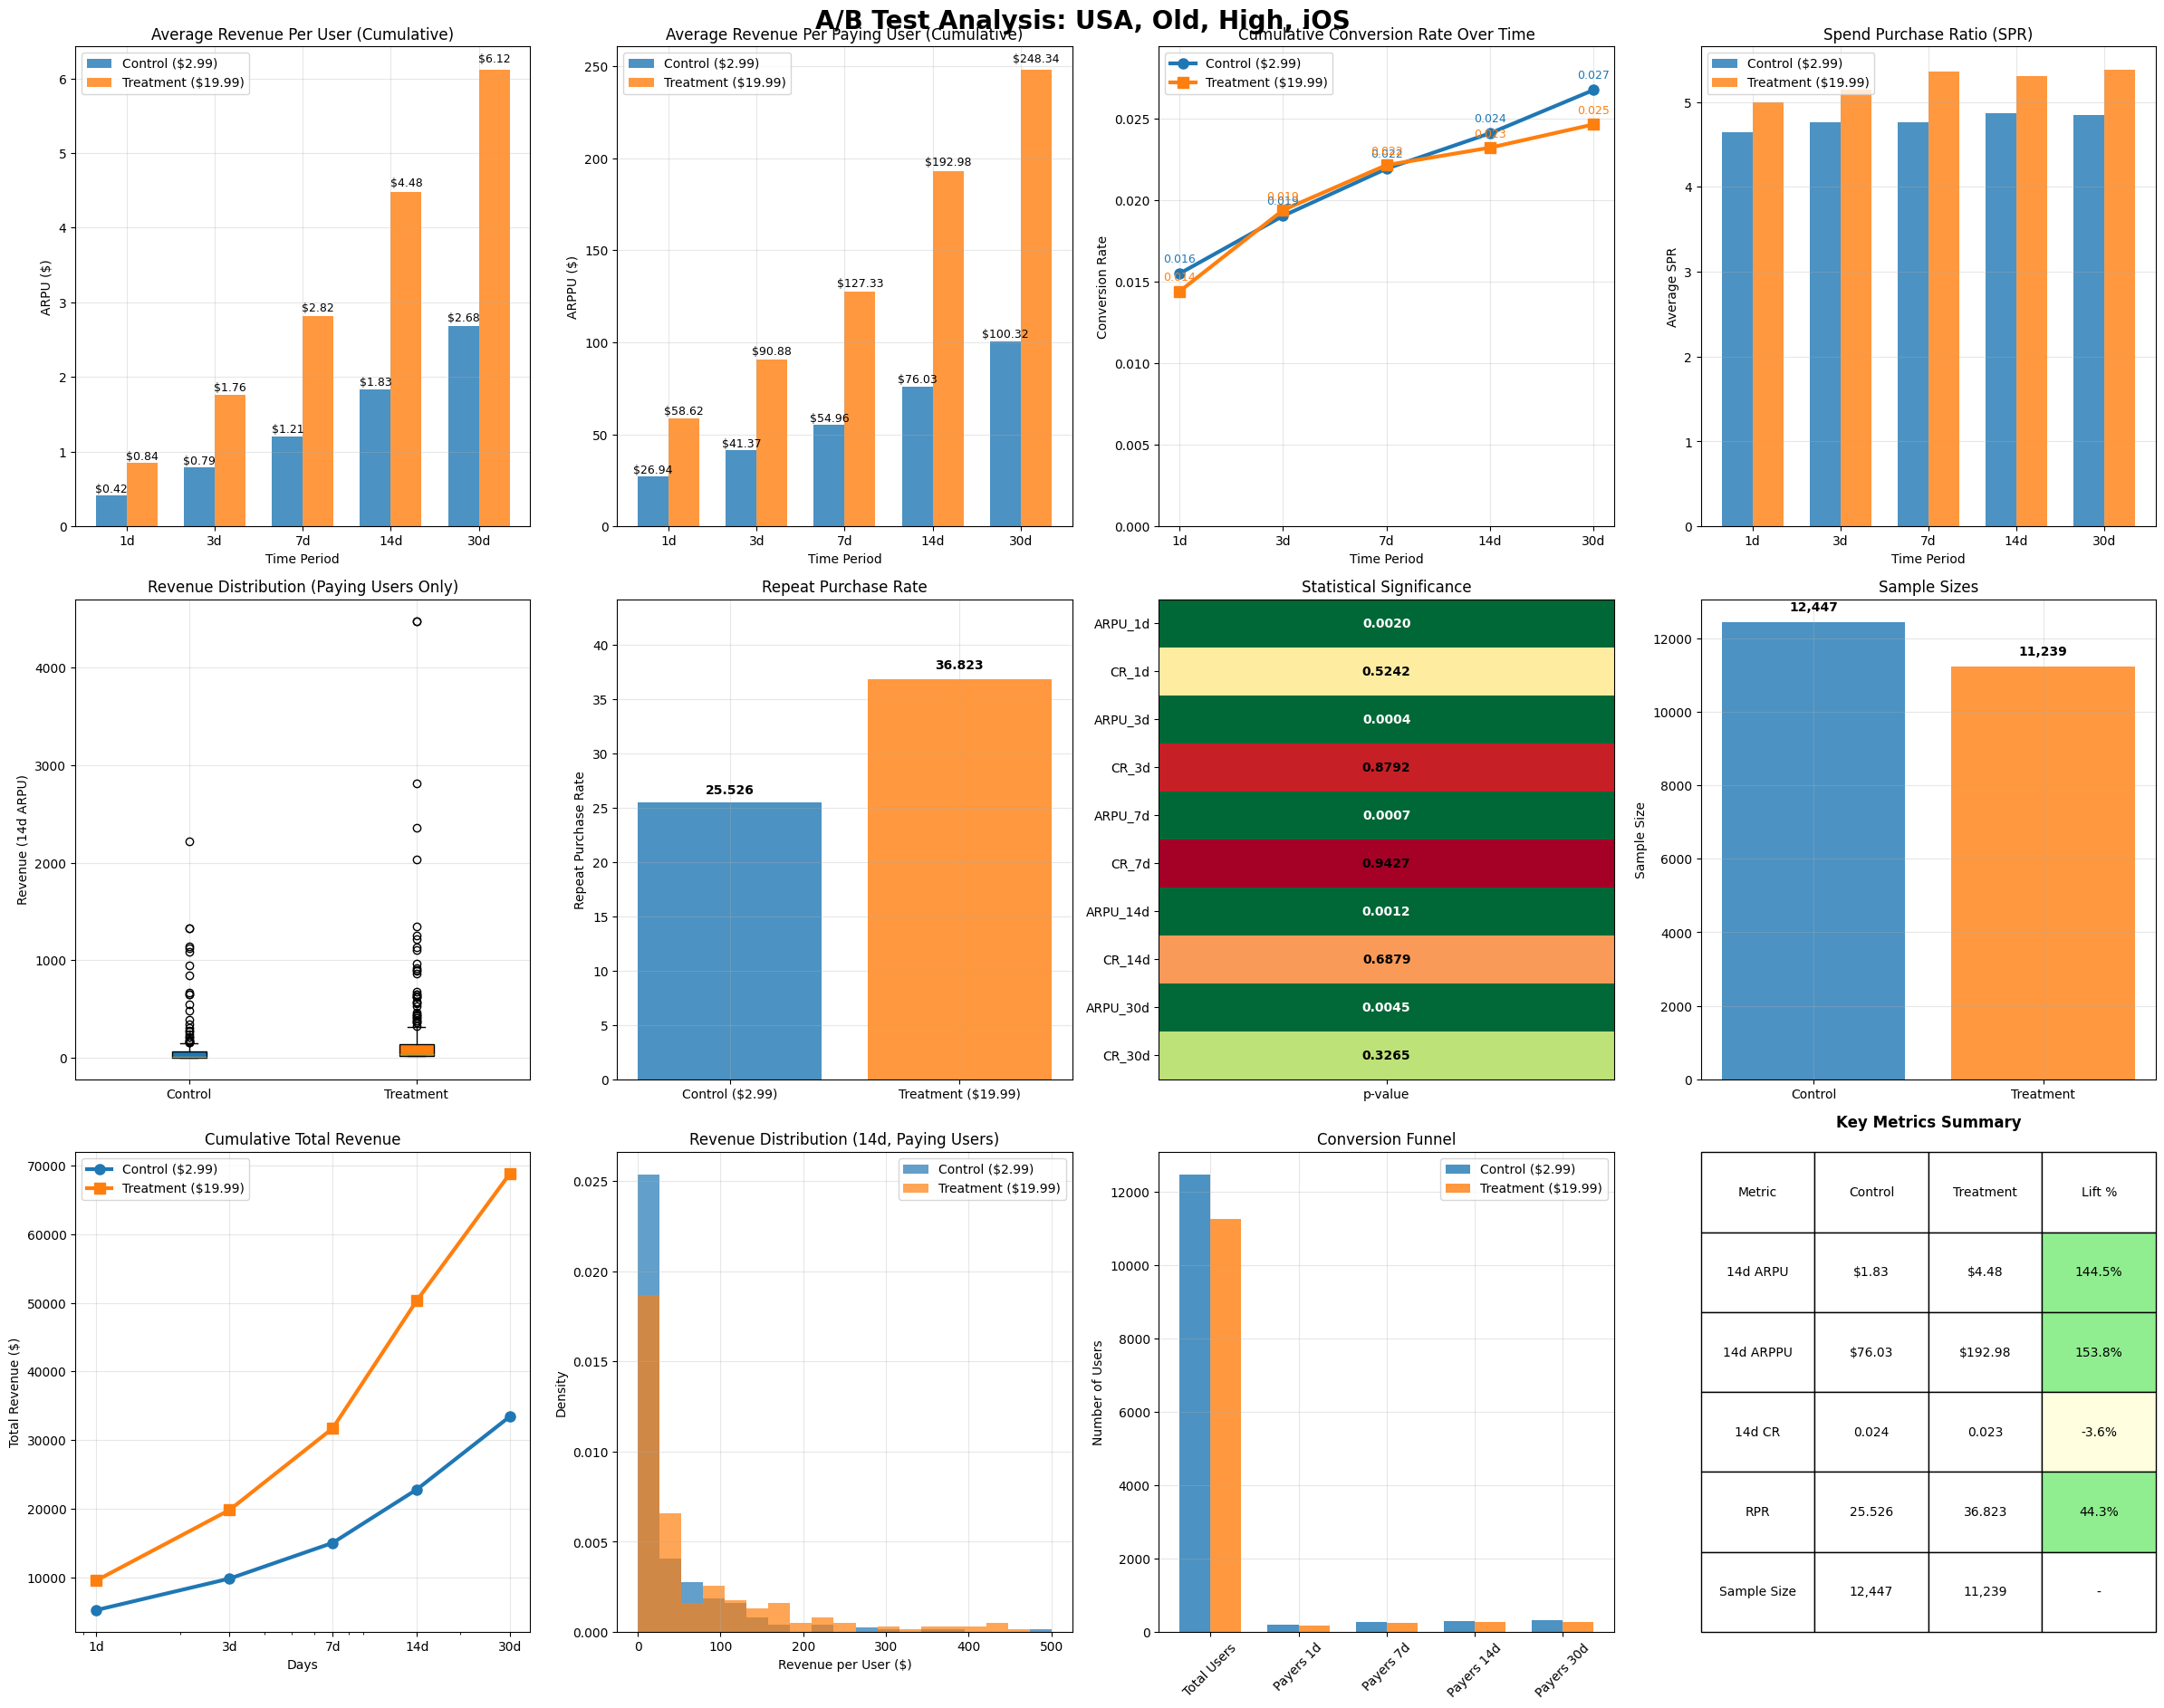

In [294]:
segment1_name = 'USA_Old_High_iOS'

segment1 = data[data['segment'] == segment1_name]
segment1_summary = compute_summary_metrics(segment1)

results = plot_ab_test_analysis(segment1, ', '.join(segment1_name.split('_')))
segment1_summary.style.apply(color_target_row, axis=1)

**USA\_Old\_Low\_Android**

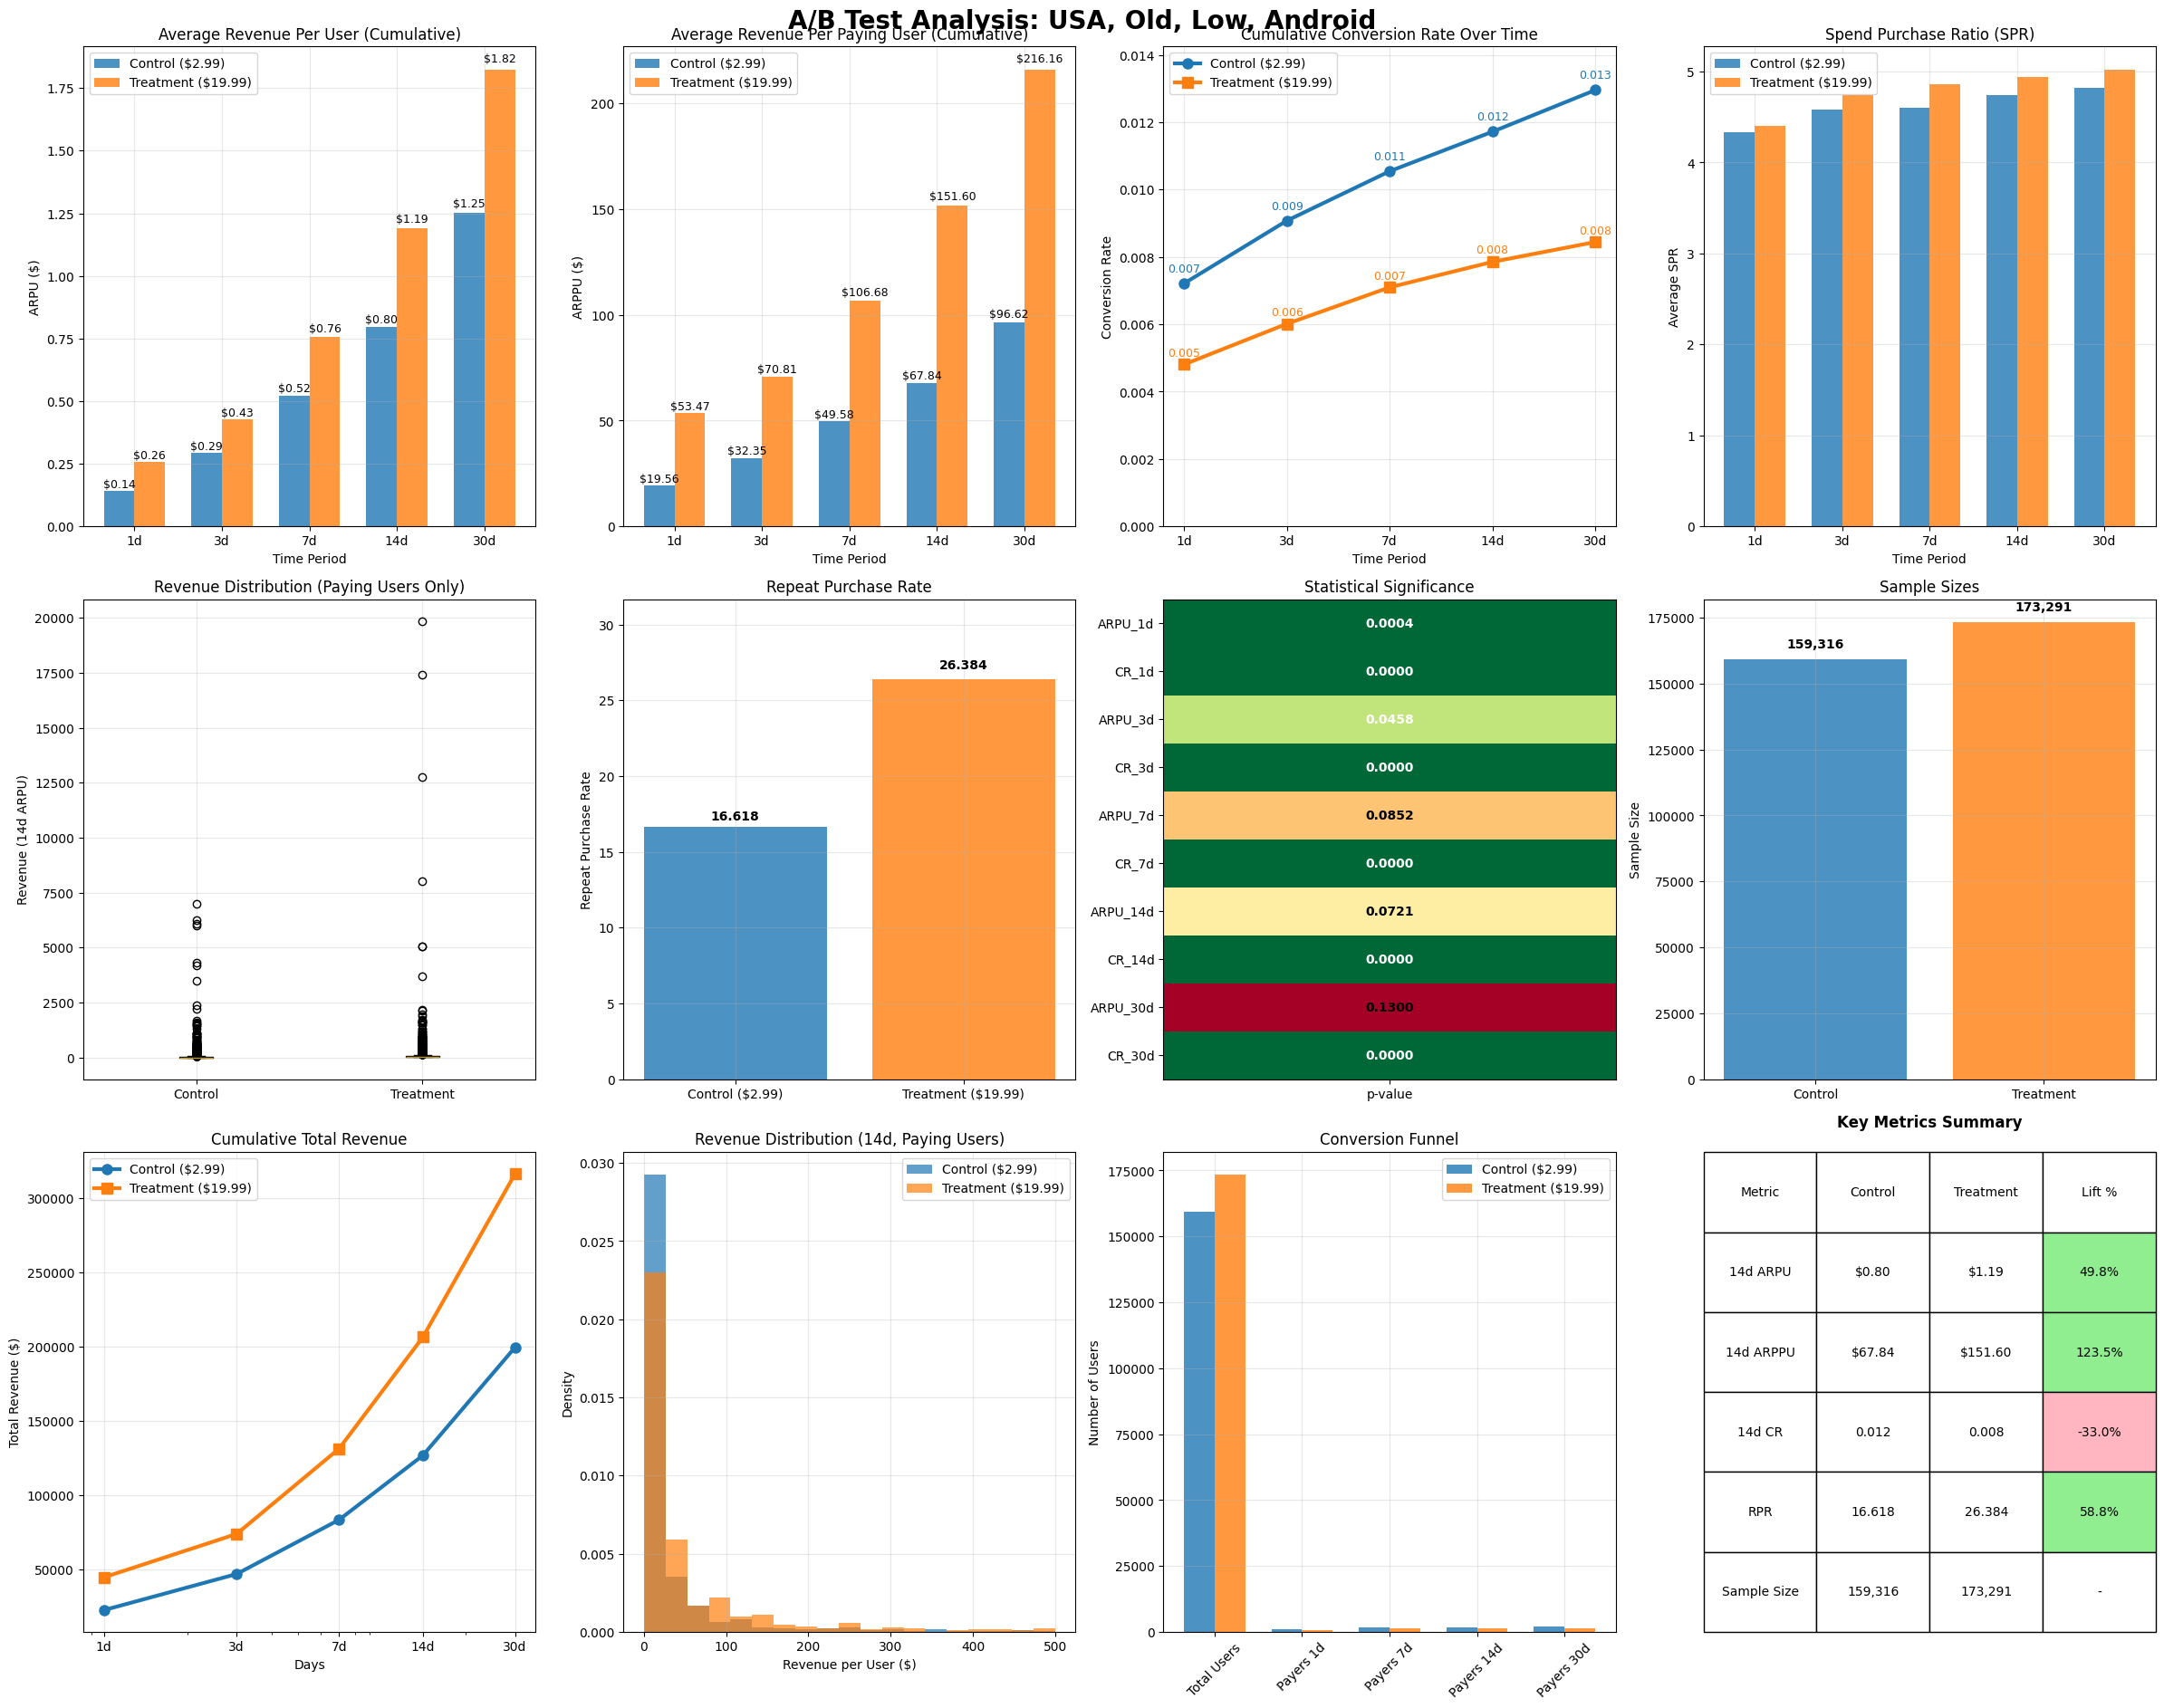

In [296]:
segment2_name = 'USA_Old_Low_Android'

segment2 = data[data['segment'] == segment2_name]
segment2_summary = compute_summary_metrics(segment2)

results = plot_ab_test_analysis(segment2, ', '.join(segment2_name.split('_')))
segment2_summary.style.apply(color_target_row, axis=1)

**Non-USA\_Young\_Low\_Android**

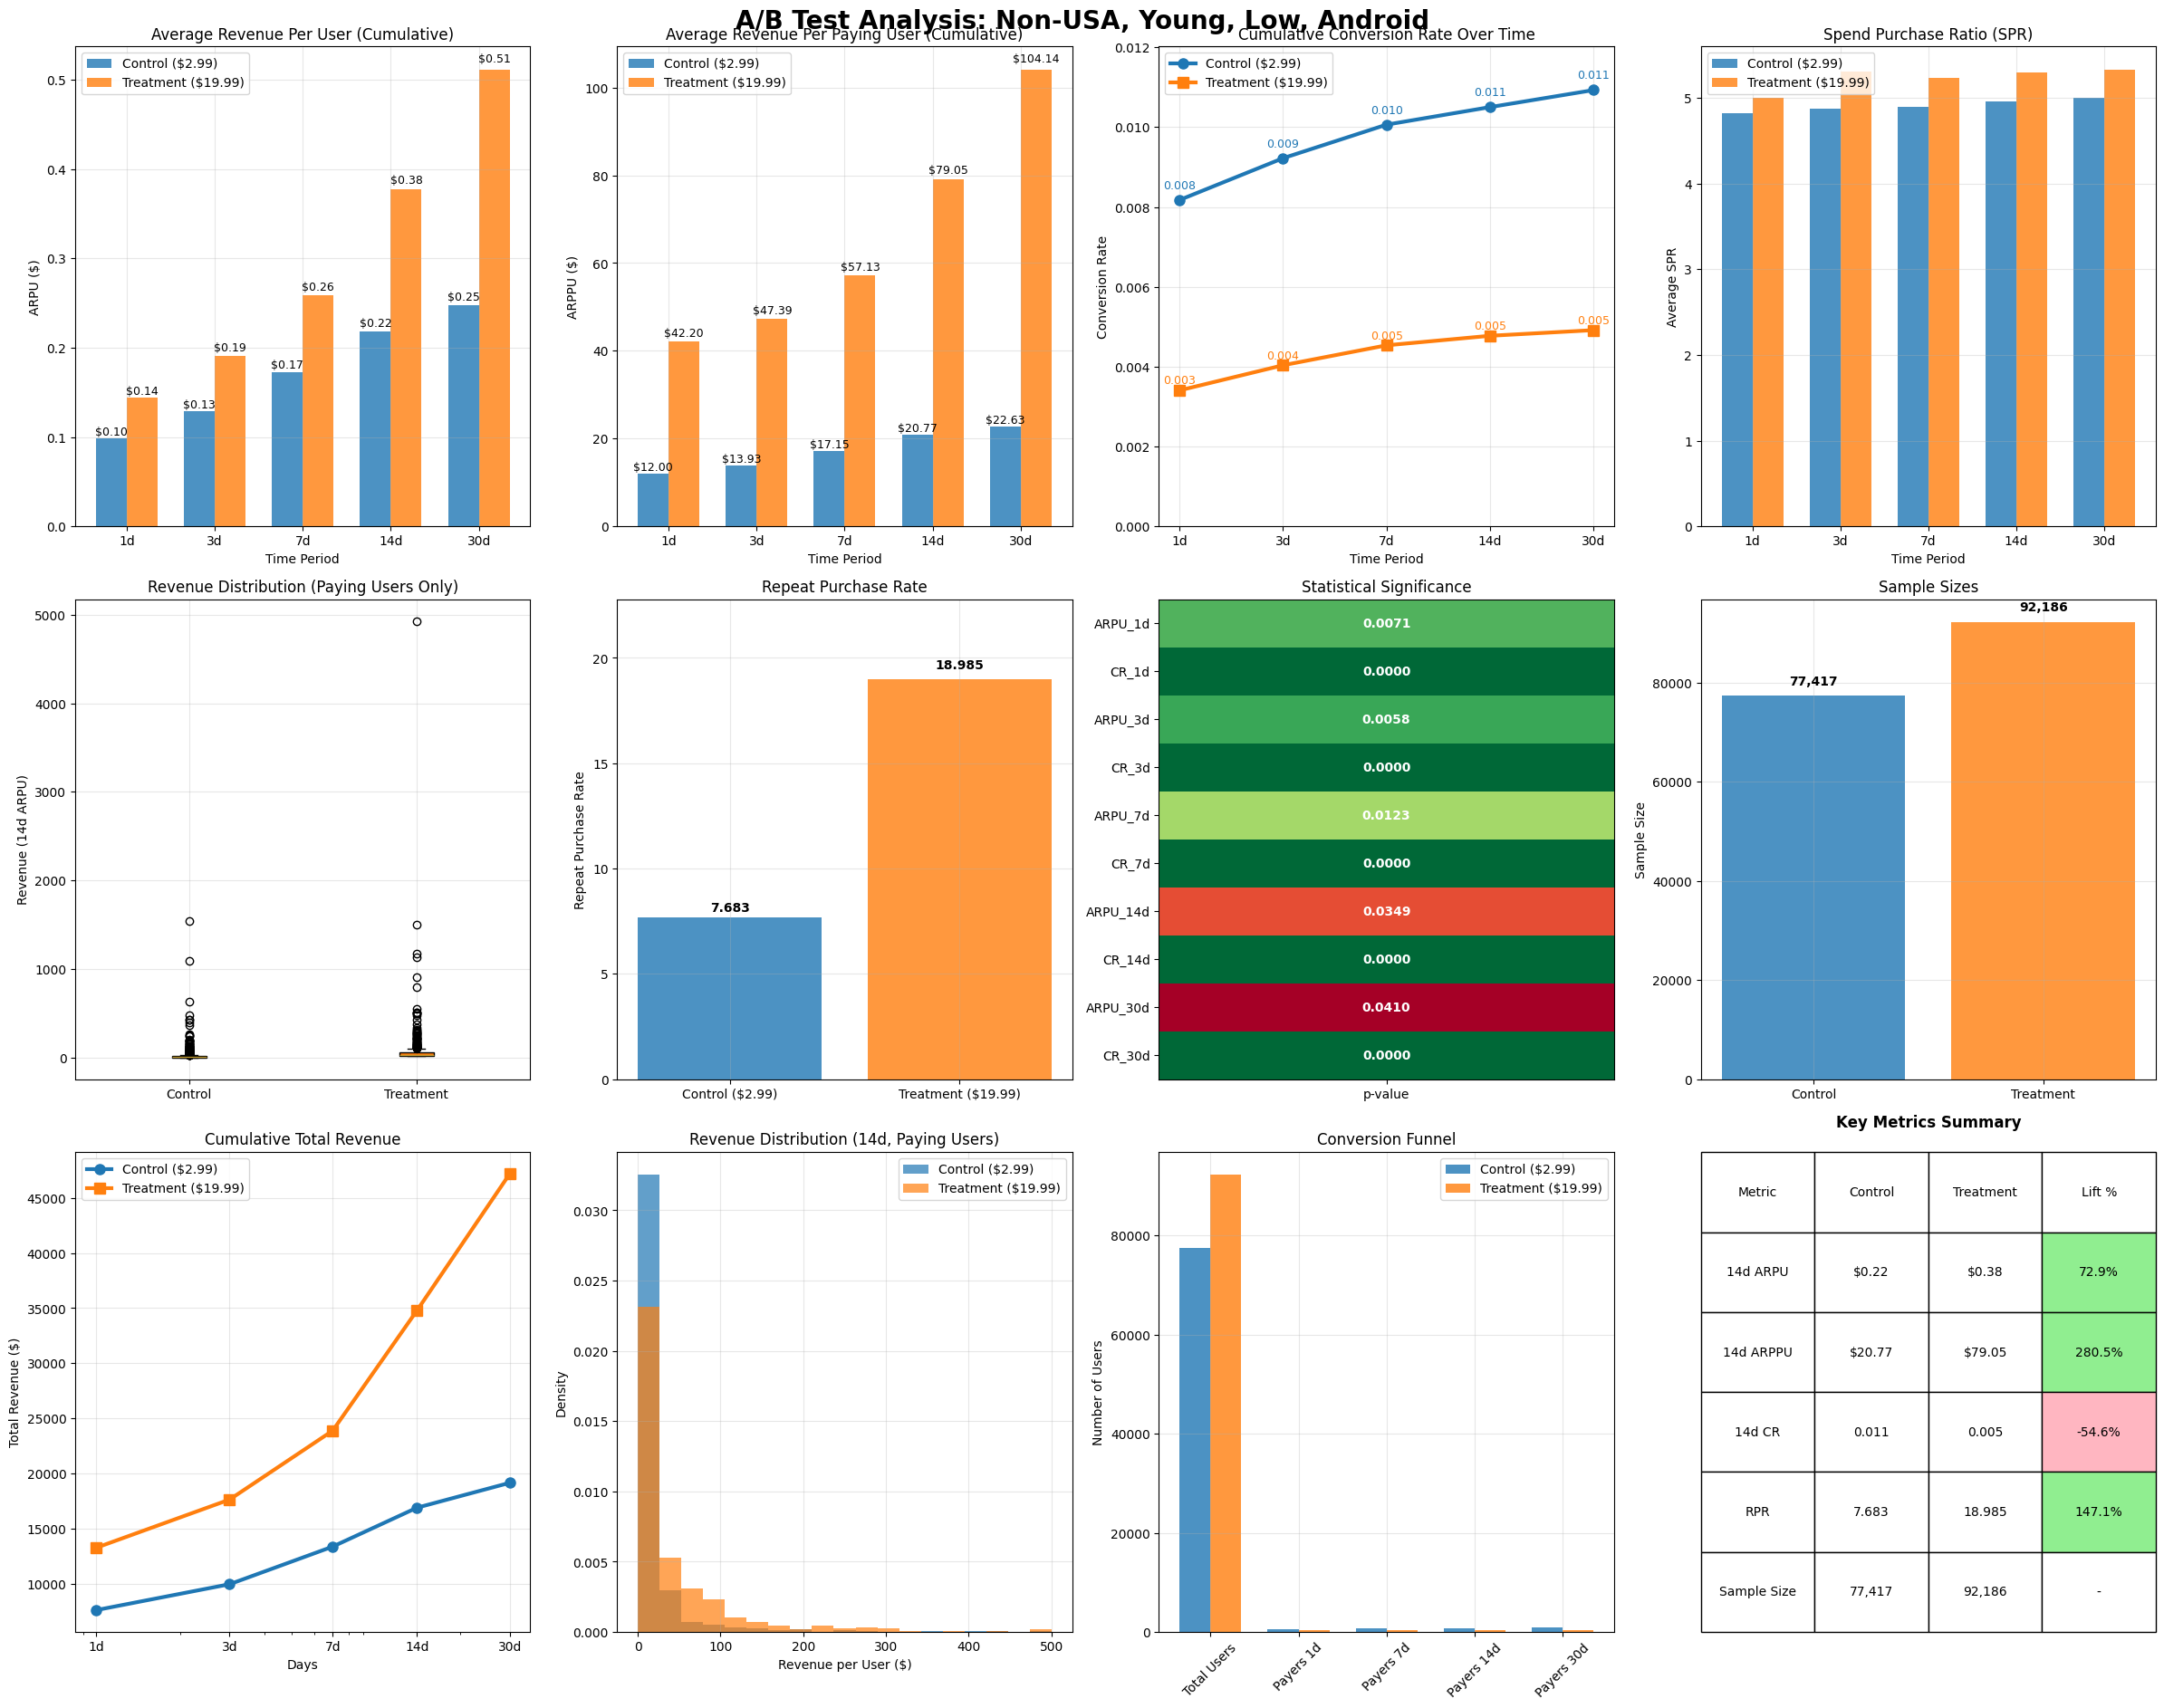

In [297]:
segment3_name = 'Non-USA_Young_Low_Android'

segment3 = data[data['segment'] == segment3_name]
segment3_summary = compute_summary_metrics(segment3)

results = plot_ab_test_analysis(segment3, ', '.join(segment3_name.split('_')))
segment3_summary.style.apply(color_target_row, axis=1)

**Non-USA\_Old\_Low\_iOS**

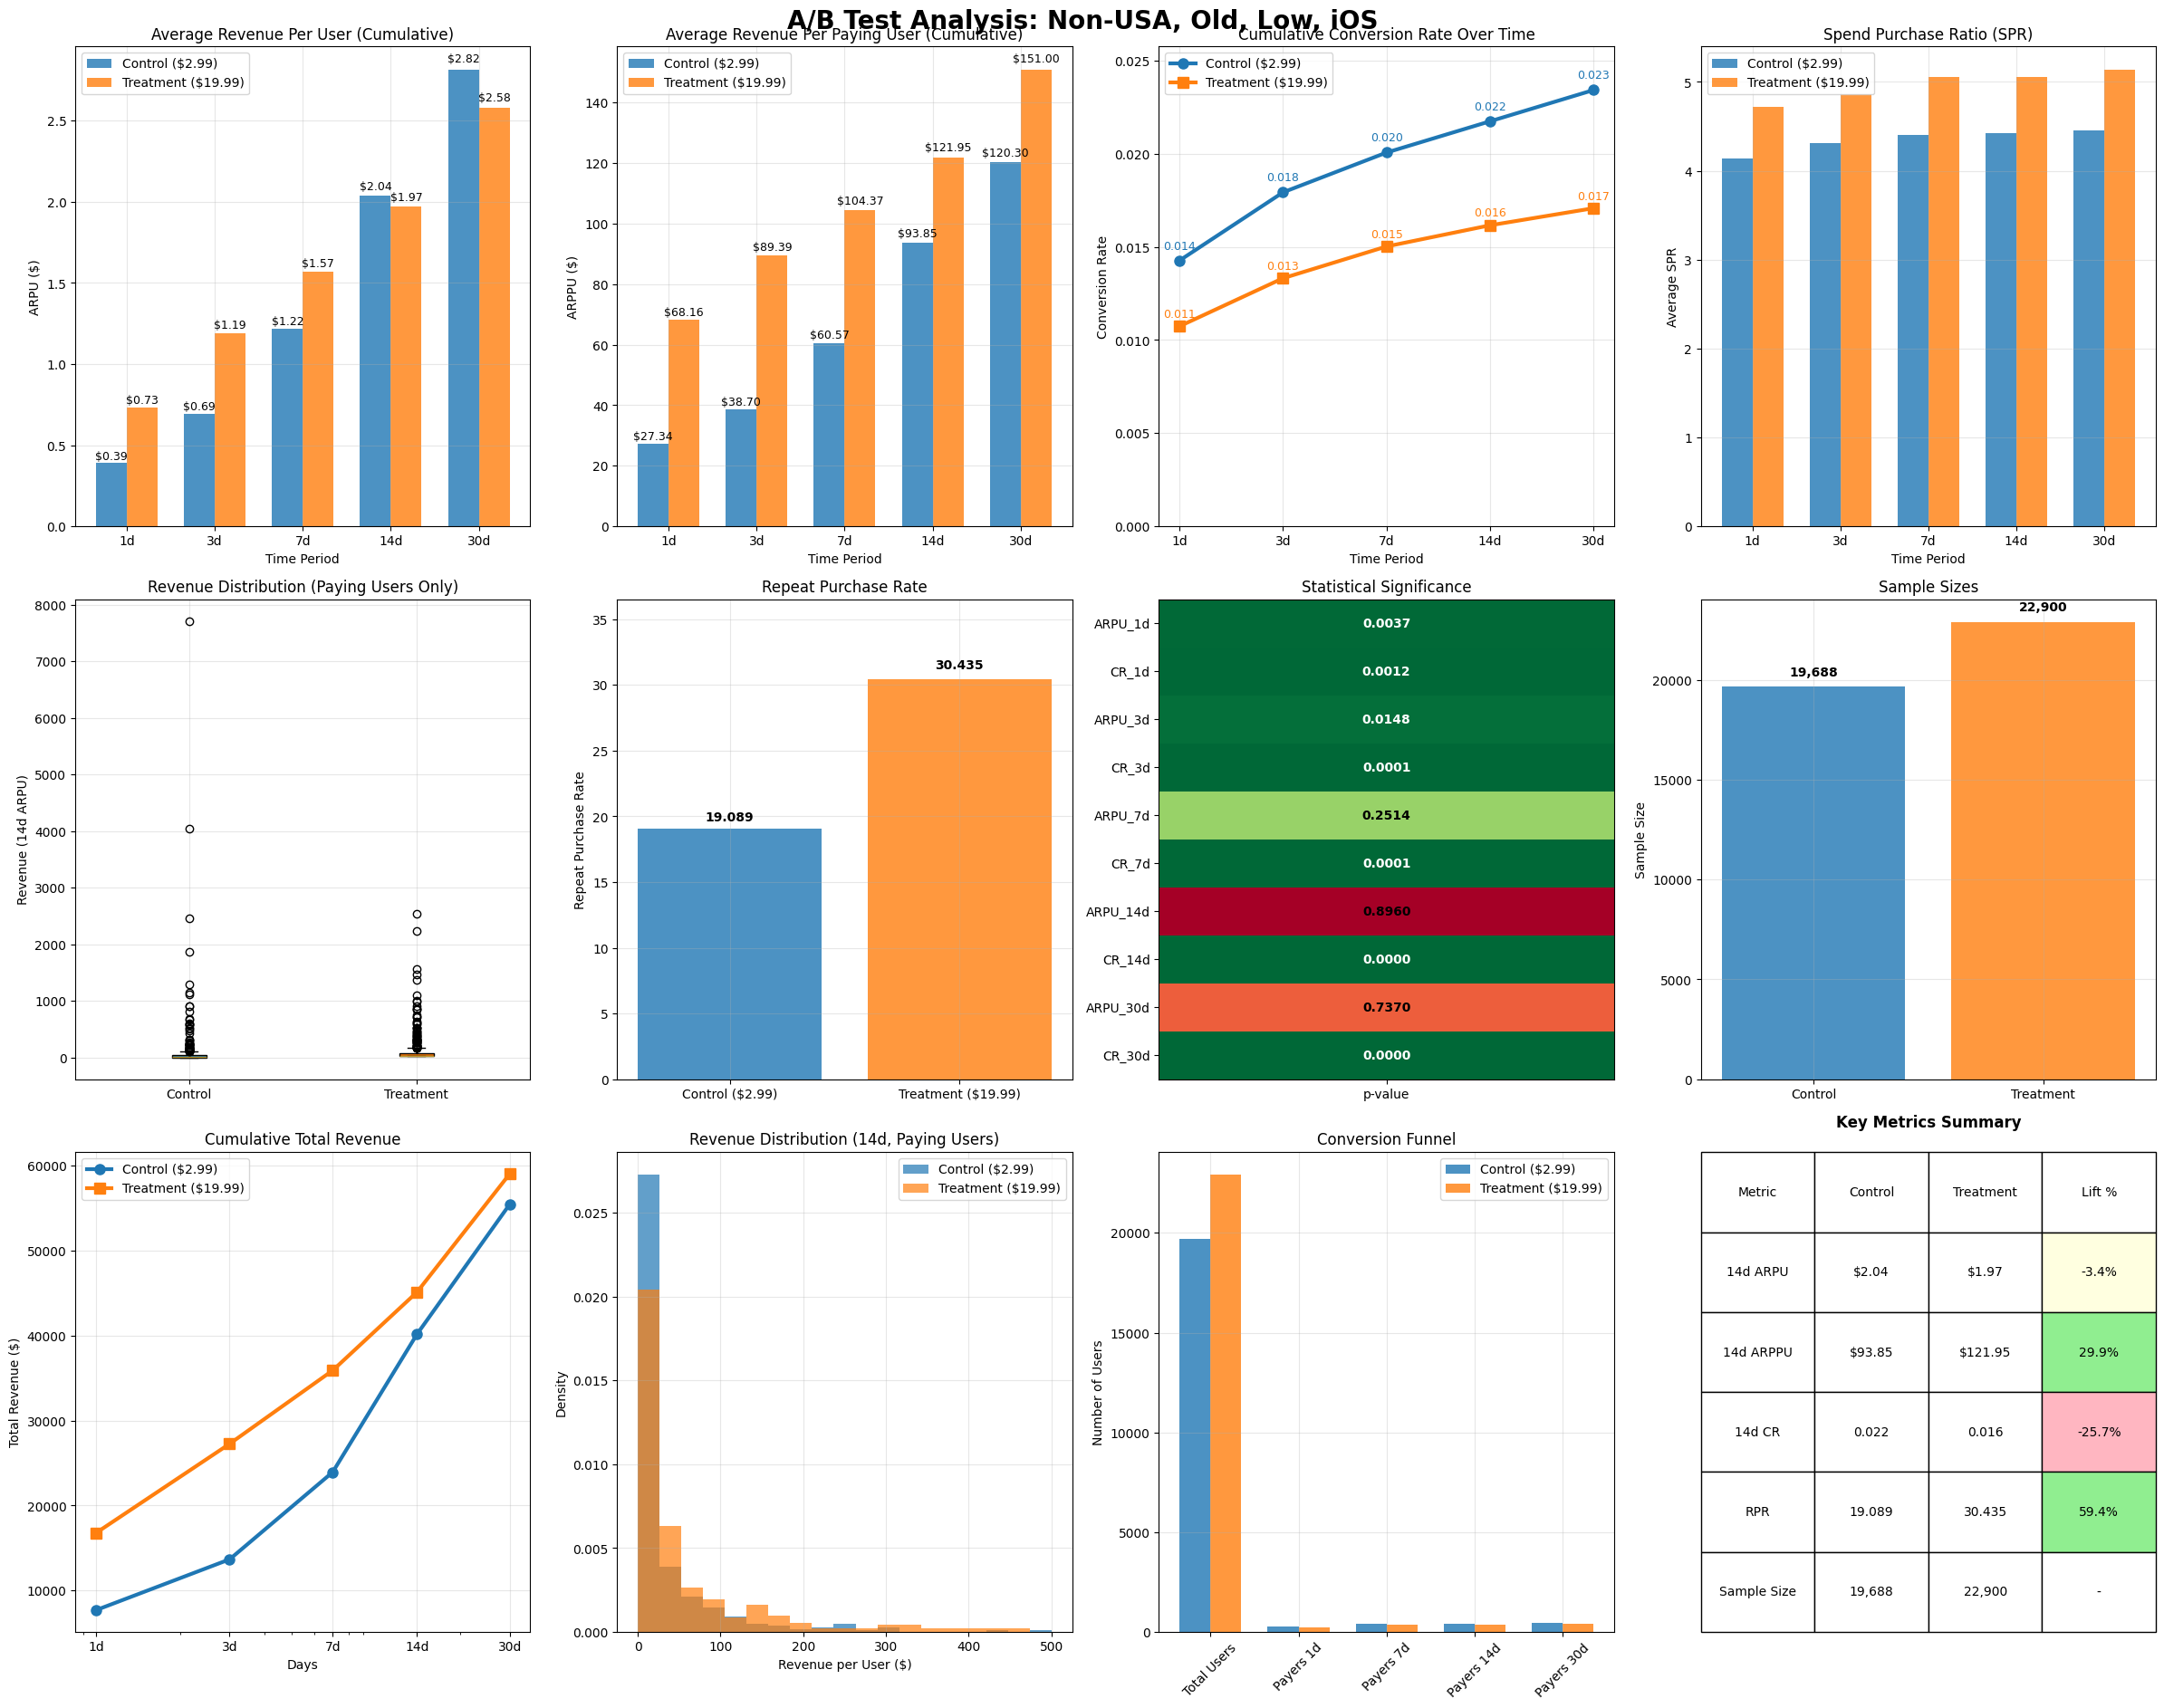

In [298]:
segment4_name = 'Non-USA_Old_Low_iOS'

segment4 = data[data['segment'] == segment4_name]
segment4_summary = compute_summary_metrics(segment4)

results = plot_ab_test_analysis(segment4, ', '.join(segment4_name.split('_')))
segment4_summary.style.apply(color_target_row, axis=1)

**Non-USA\_Old\_Low\_Windows**

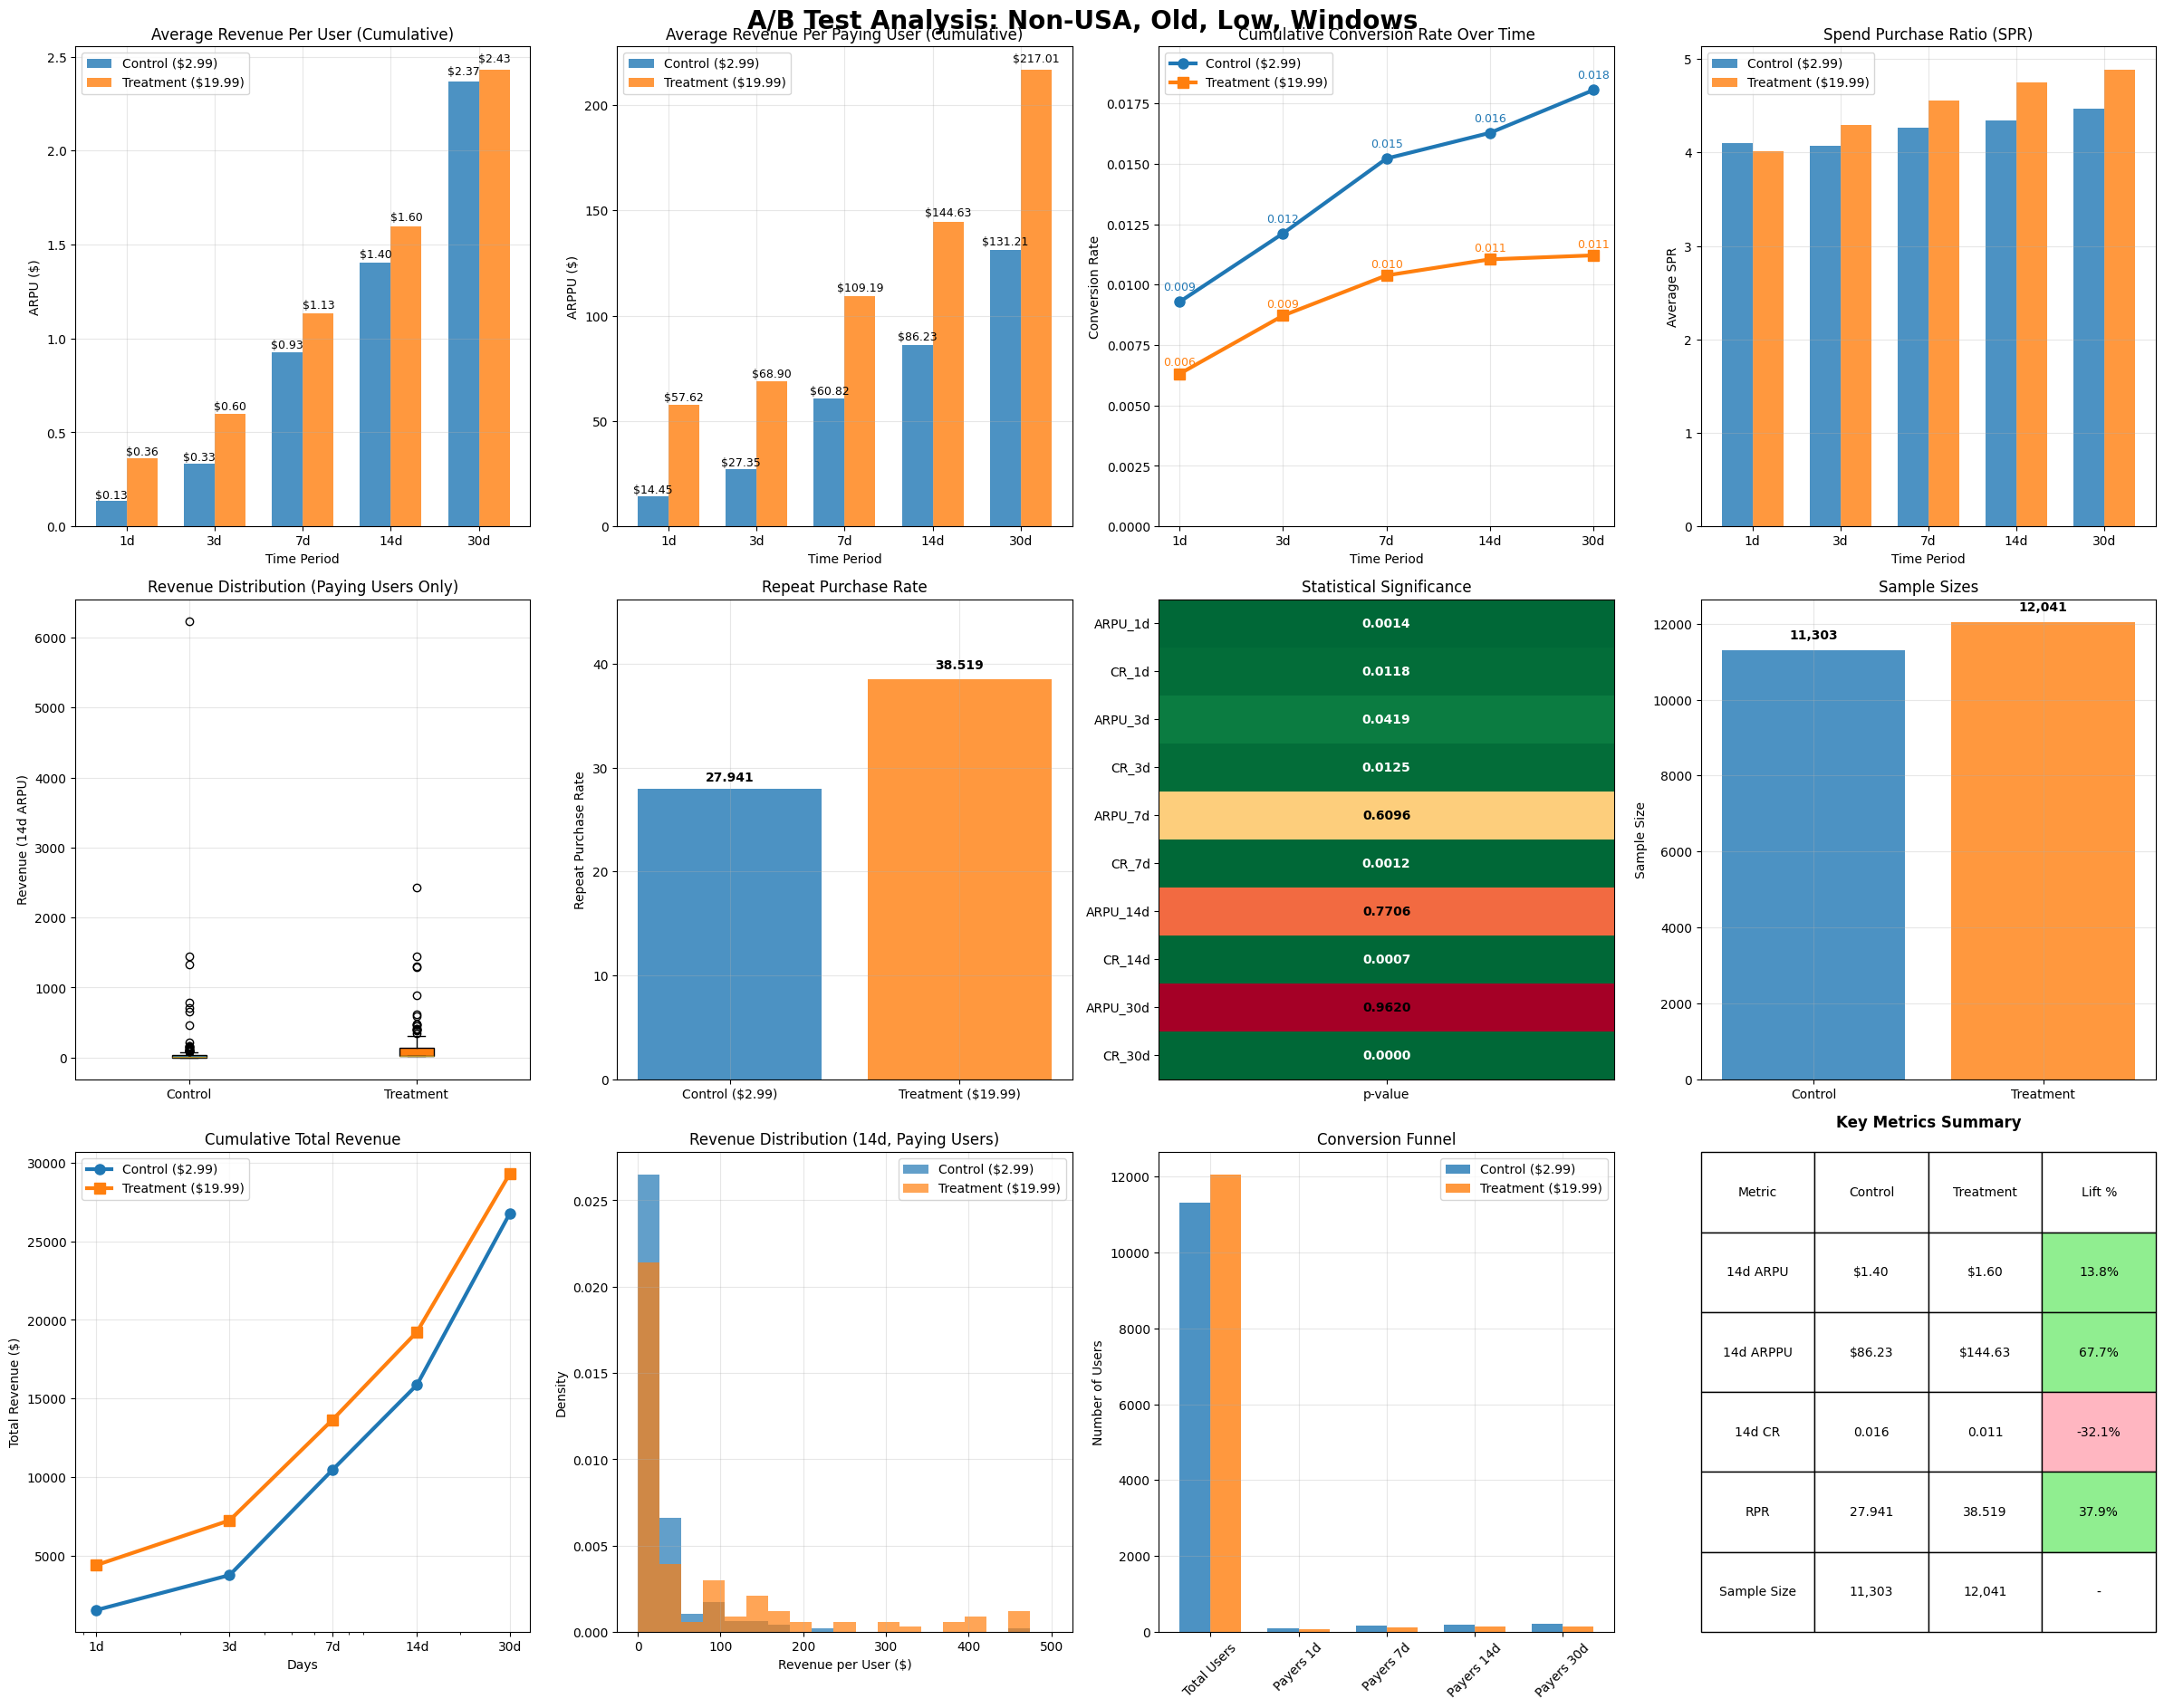

In [299]:
segment5_name = 'Non-USA_Old_Low_Windows'
# segment5_name = 'USA_Old_Low_Android'

segment5 = data[data['segment'] == segment5_name]
segment5_summary = compute_summary_metrics(segment5)

results = plot_ab_test_analysis(segment5, ', '.join(segment5_name.split('_')))
segment5_summary.style.apply(color_target_row, axis=1)

### 6. Strategic Implications

- Mature, high-LTV segments can tolerate or even benefit from higher pricing.
- Low-tier or younger segments are mostly highly price-sensitive — need mid-price testing.
- Higher SPR and RPR values suggest that users who do convert at $19.99 tend to engage more deeply and repeat purchase more often.
- Increased credit usage may support bonus packs, bundles, or gamified upsells.

### 7. Recommended Next Steps

| Step                              | Action                                                                 |
| --------------------------------- | ---------------------------------------------------------------------- |
| ✅ Pricing assignment             | Roll out $19.99 to winning segments, keep $2.99 where advised         |
| 🧪 Mid-price A/B test             | Design test for $7.99-$14.99 in mid-value segments                    |
| 📈 Monitoring                     | Track post-deployment CR, ARPU, churn in high- and mid-tier segments  |
| 🧠 Experiment extensions          | Consider time-based pricing, limited offers, or credit bundles        |